<BarContainer object of 30 artists>

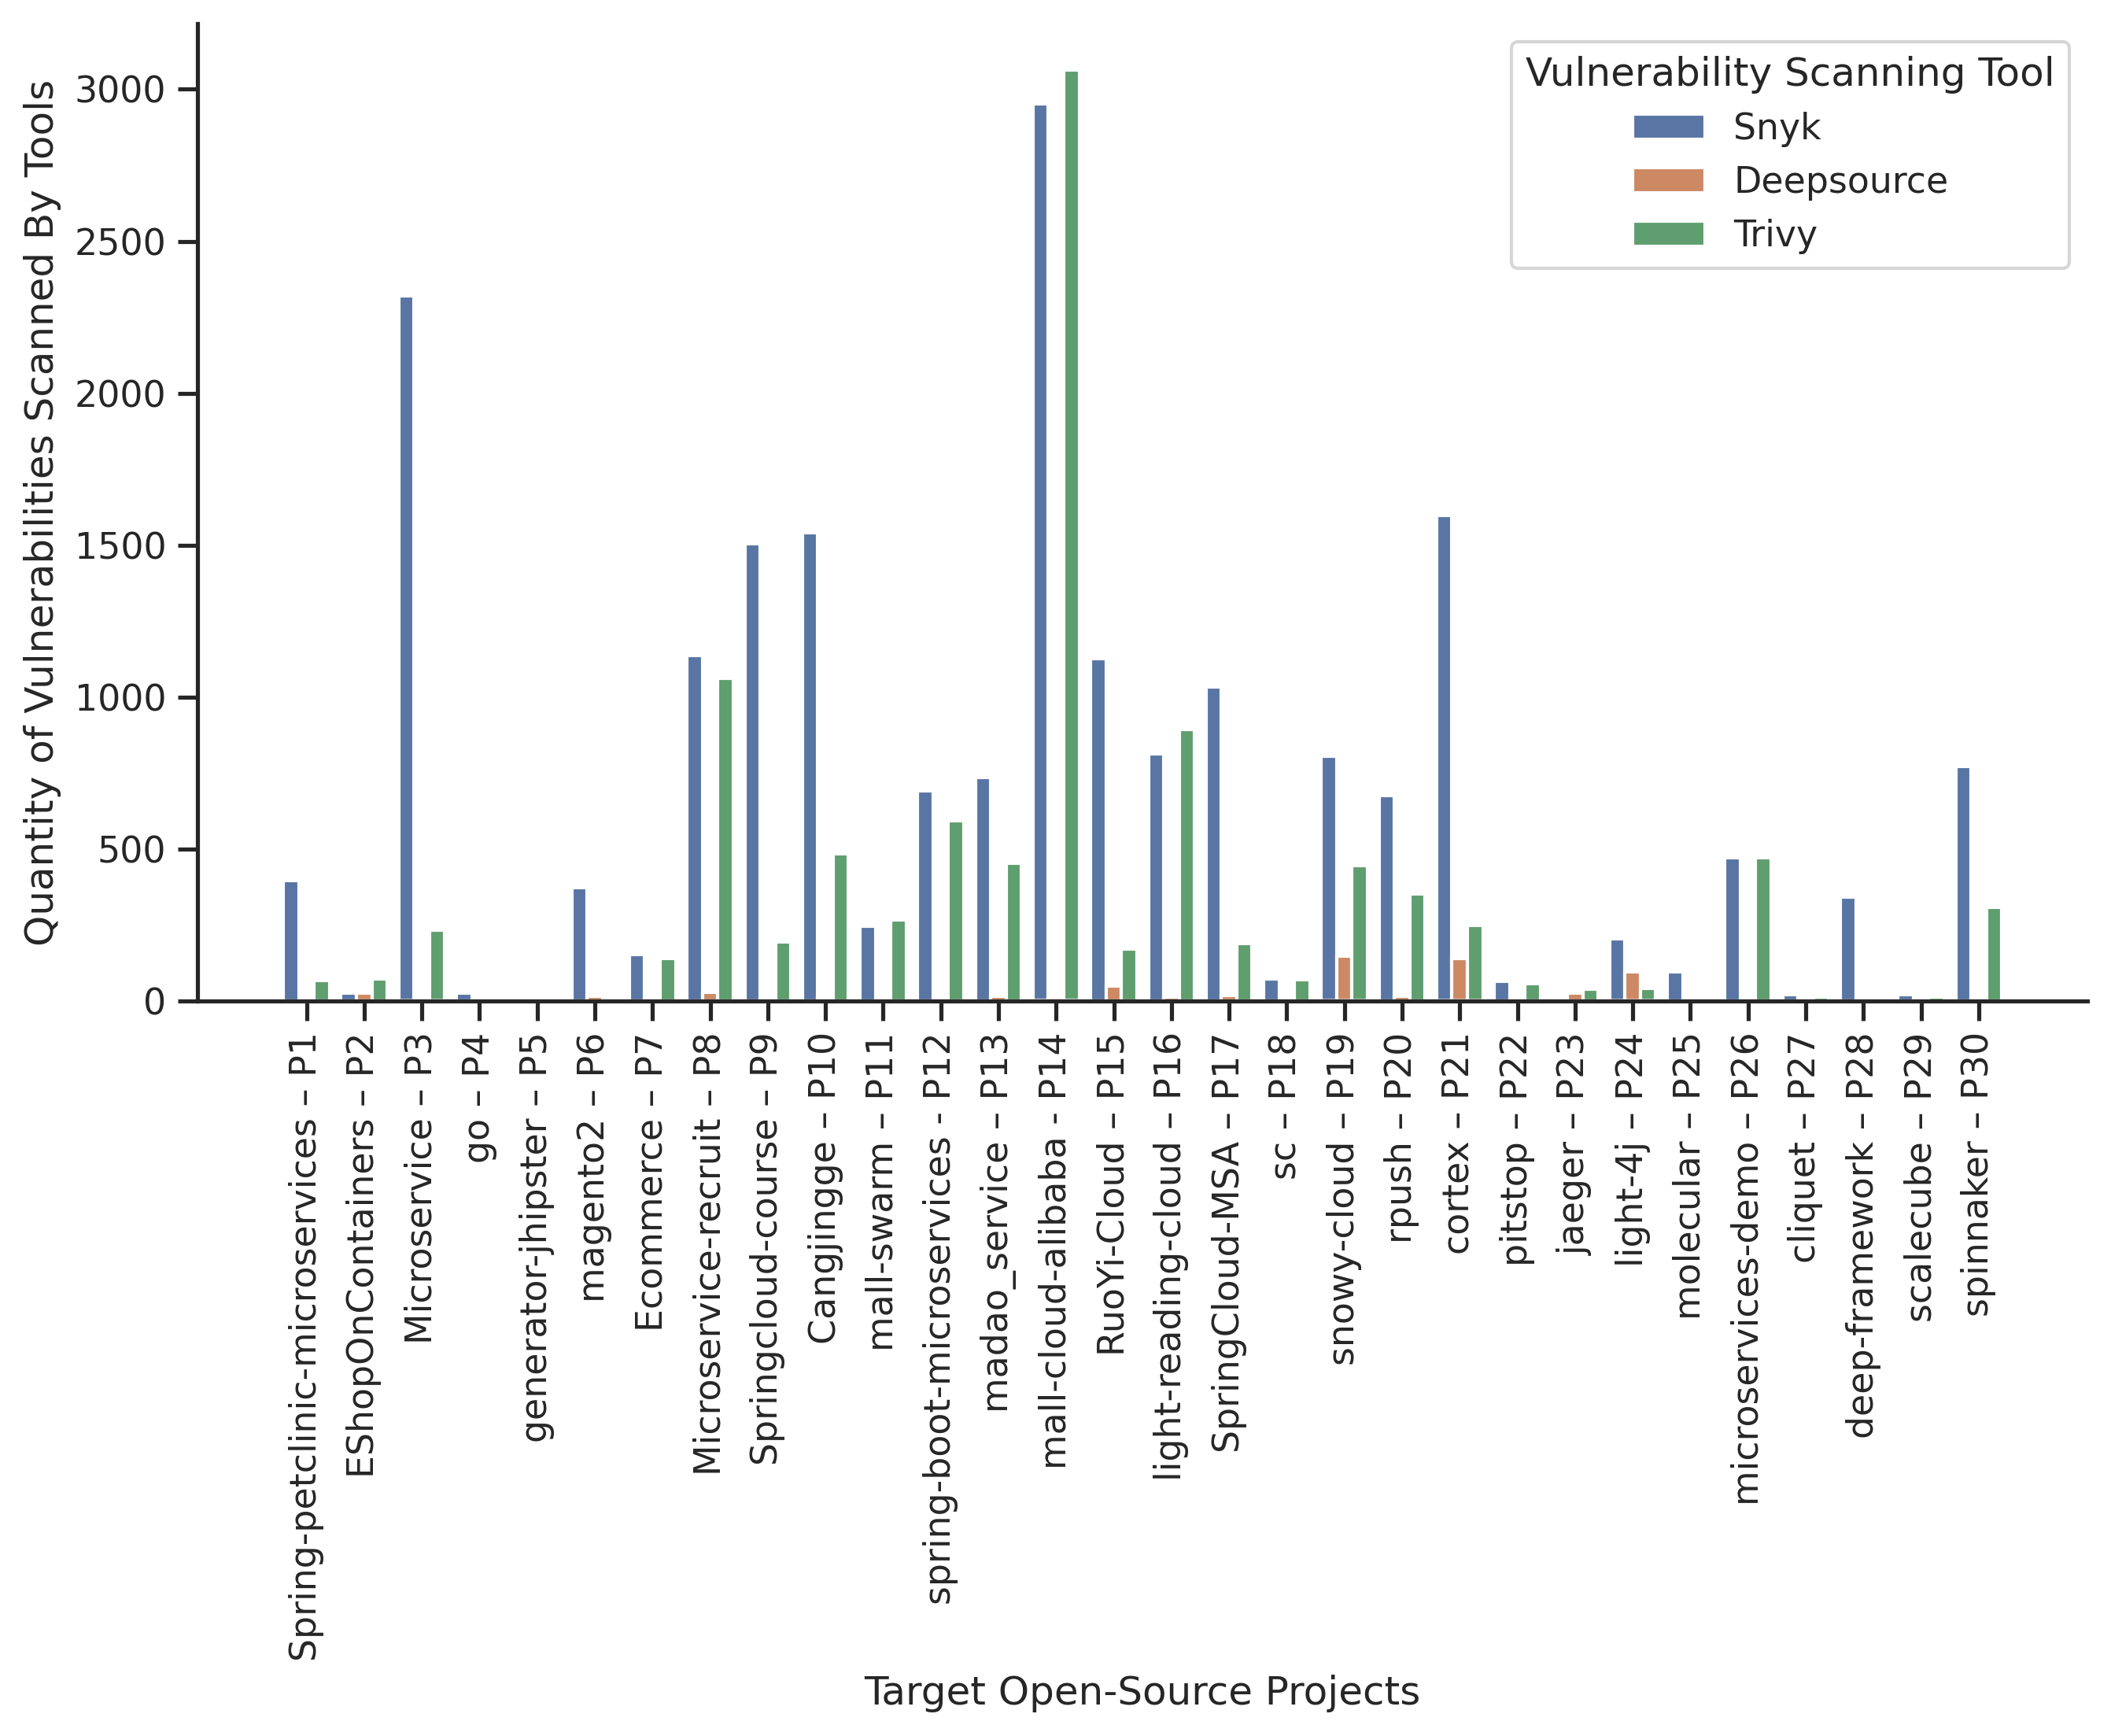

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import preprocessing
from pandas_ods_reader import read_ods
import seaborn as sns
sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")
    
    
#df = read_ods("Category_Split.ods")
df = pd.read_excel('Project-vs-Sources.ods', engine='odf')

df = pd.melt(df, id_vars="Target Open-Source Projects", var_name="Vulnerability Scanning Tool", value_name="Quantity of Vulnerabilities Scanned By Tools")
g = sns.catplot(
    x='Target Open-Source Projects',
    y='Quantity of Vulnerabilities Scanned By Tools',
    hue='Vulnerability Scanning Tool',
    data=df,
    kind='bar',
    height=5,
    aspect=2,
    legend_out=False
)
#g.set_xticklabels(rotation=0)

normalize_max = 1
normalize_min = 0.1


df = pd.read_excel('Project-vs-Sources.ods', engine='odf')
columns = ["Snyk","Deepsource","Trivy"]
df[columns]= preprocessing.minmax_scale(df[columns], feature_range=(normalize_min, normalize_max))

ax=plt.subplot(111)

plt.xticks(rotation=90)
ax.bar(df['Target Open-Source Projects'], df['Snyk'], color='red', alpha=0.5)
ax.bar(df['Target Open-Source Projects'], df['Deepsource'], color='blue', alpha=0.5)
ax.bar(df['Target Open-Source Projects'], df['Trivy'], color='purple', alpha=0.5)

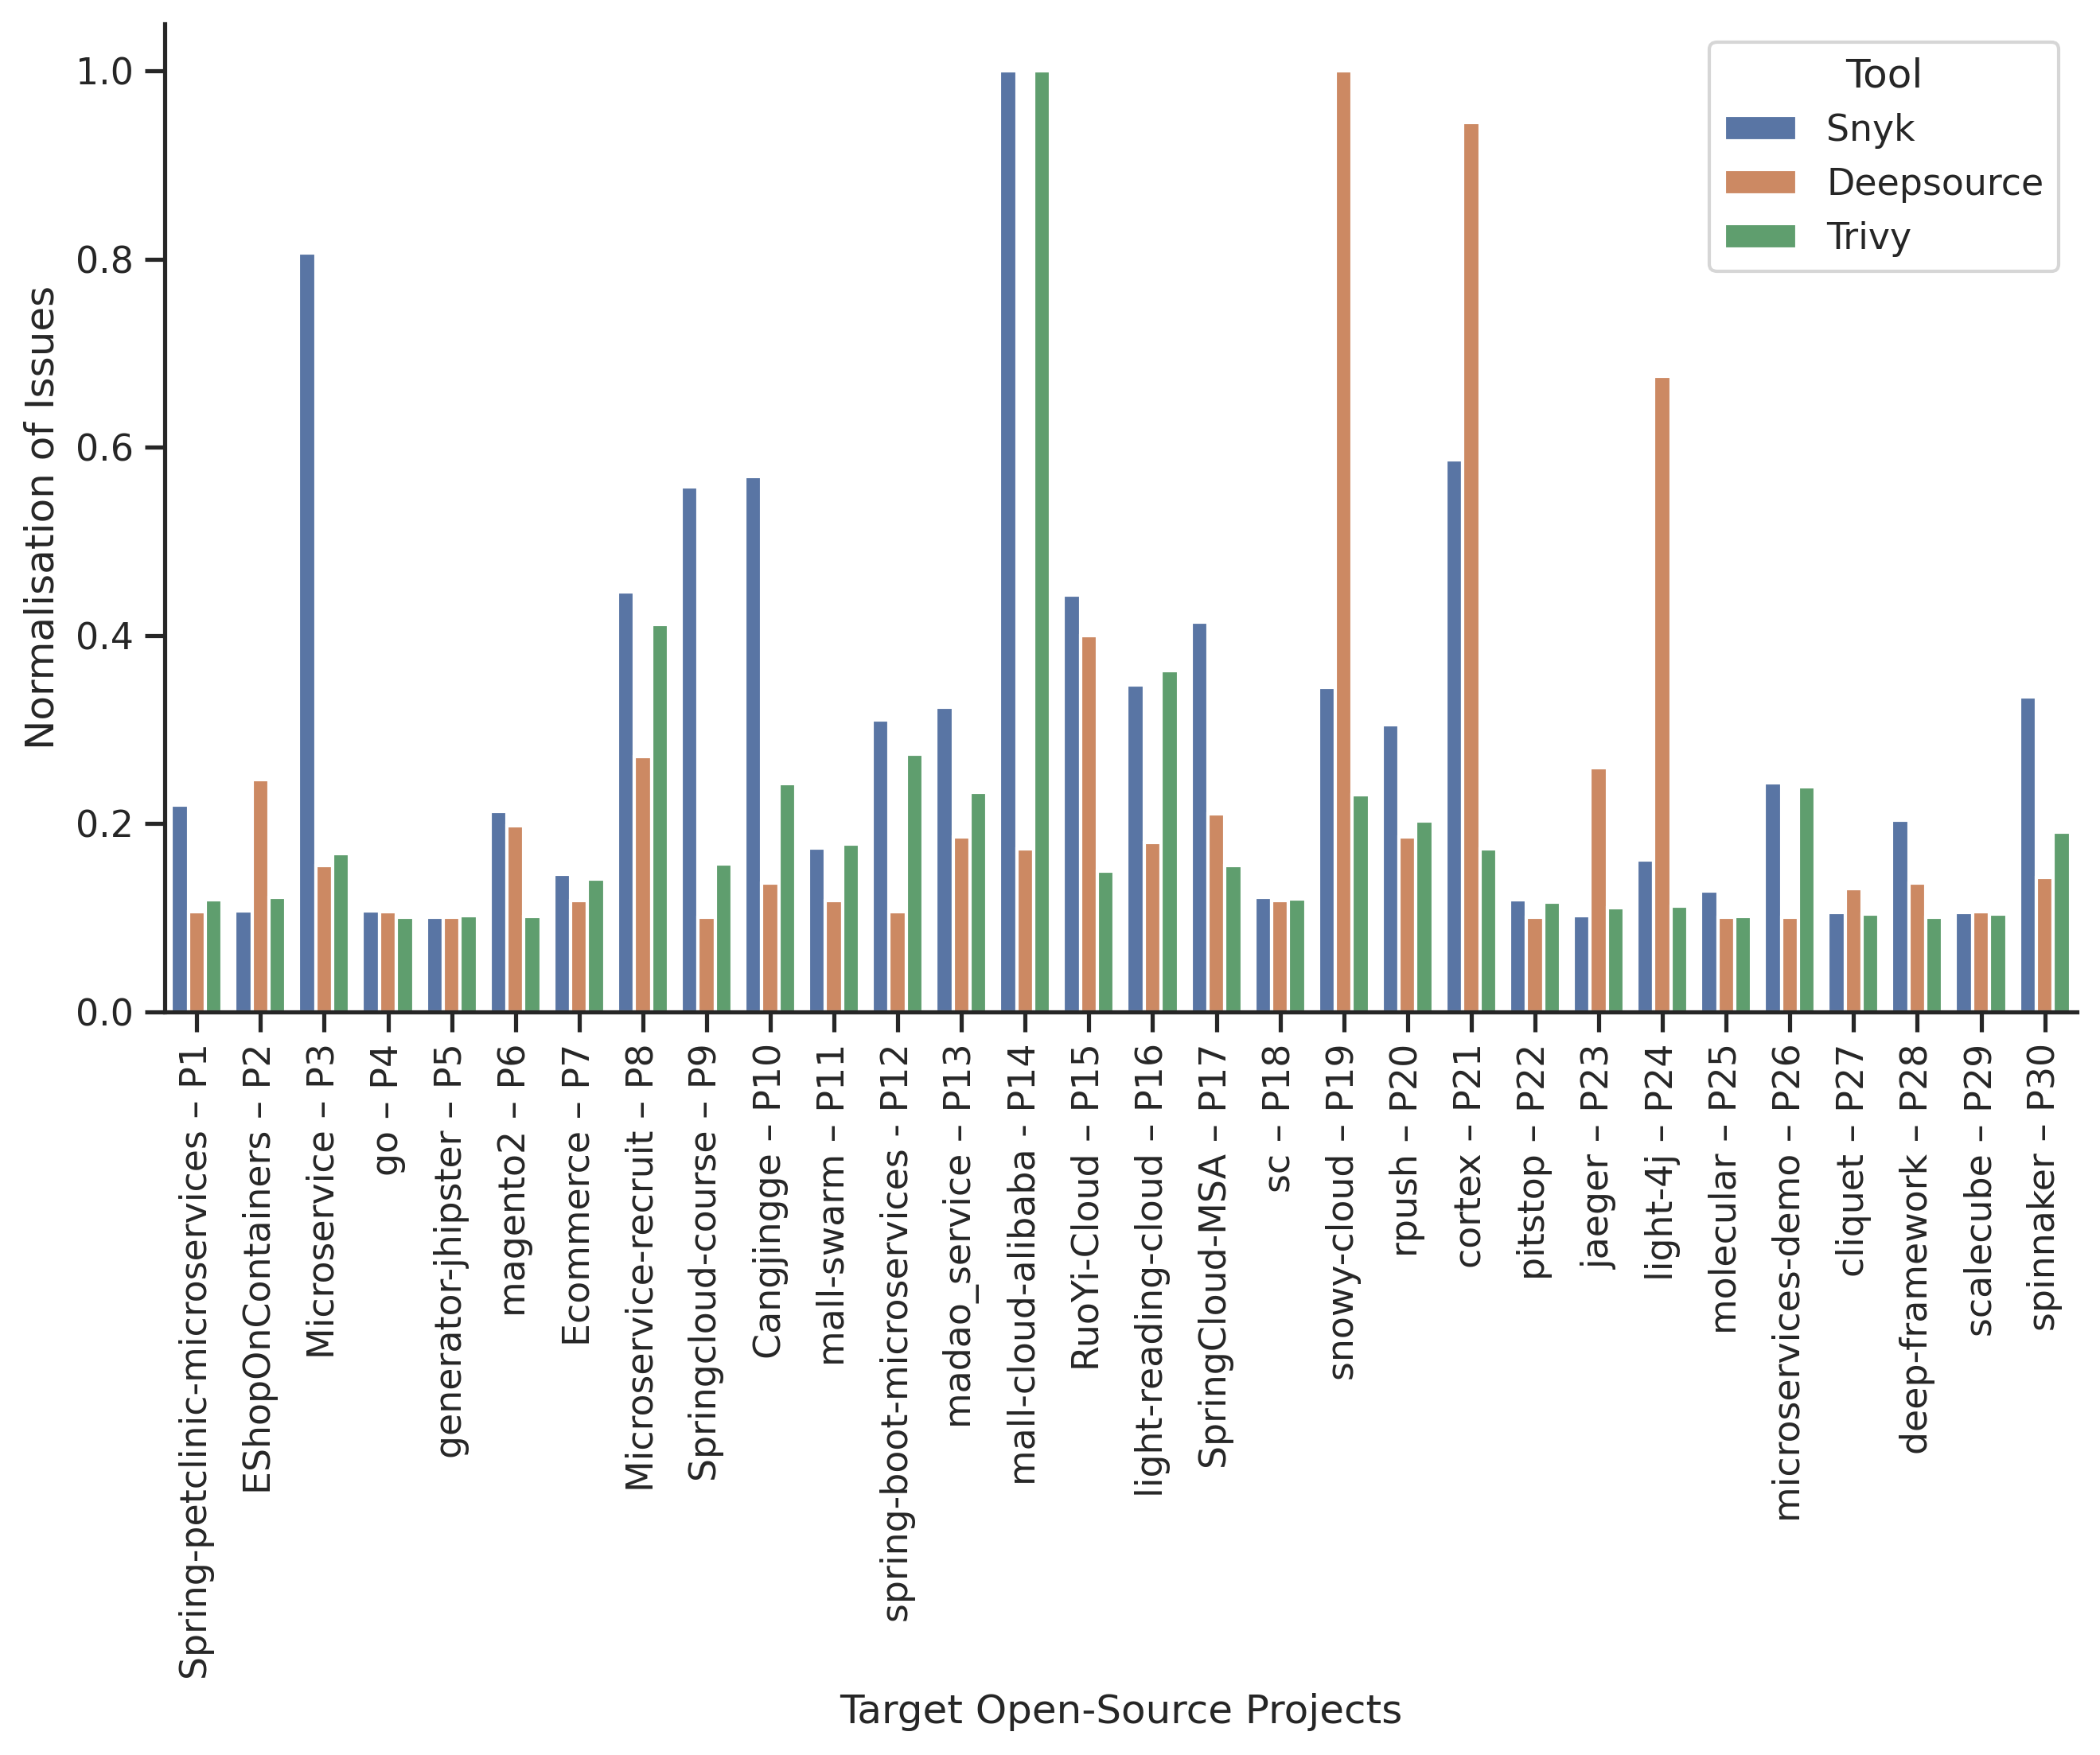

In [2]:
df = pd.melt(df, id_vars="Target Open-Source Projects", var_name="Tool", value_name="Normalisation of Issues")
g = sns.catplot(
    x='Target Open-Source Projects',
    y='Normalisation of Issues',
    hue='Tool',
    data=df,
    kind='bar',
    height=5,
    aspect=2,
    legend_out=False
)
g.set_xticklabels(rotation=90)

Text(0, 0.5, 'Quantity of Vulnerabilities Detetced')

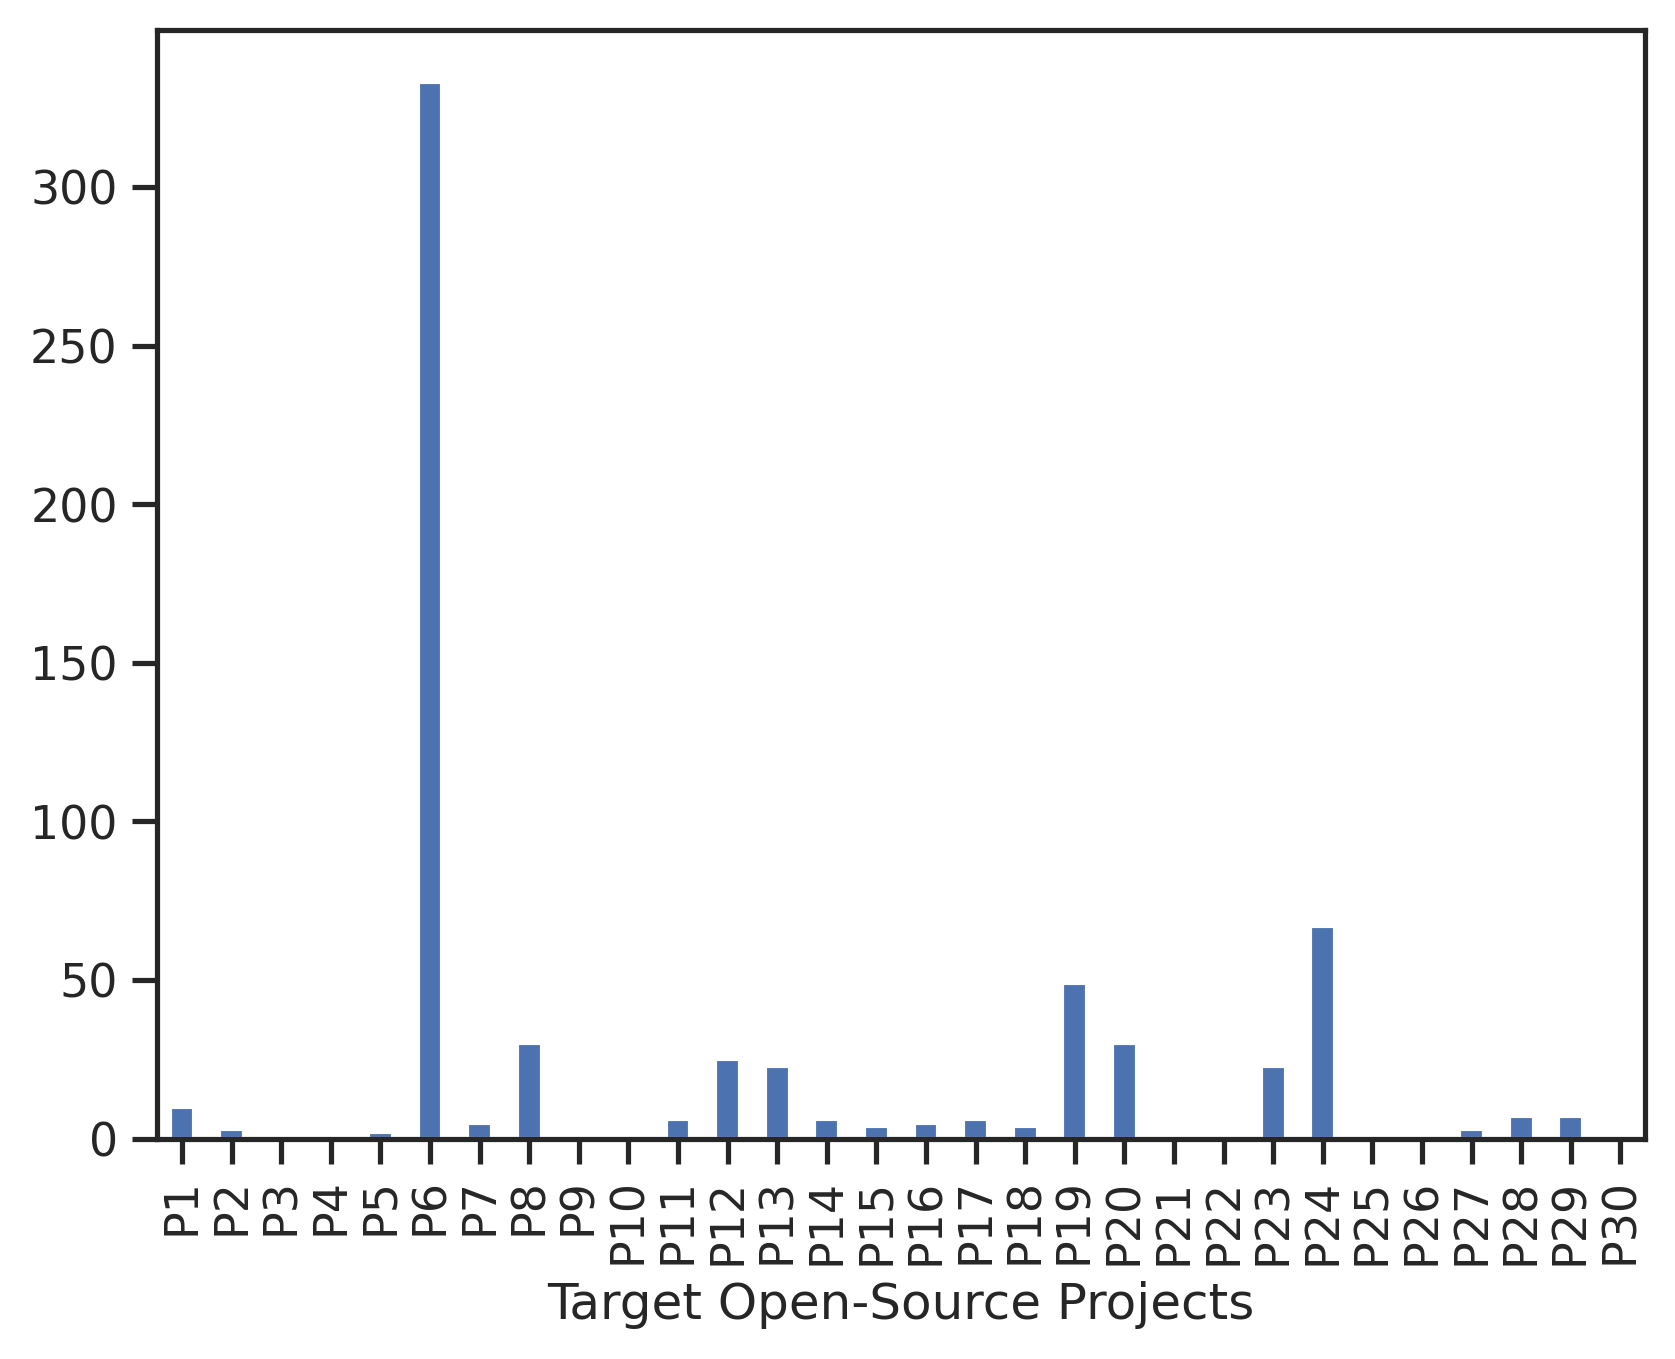

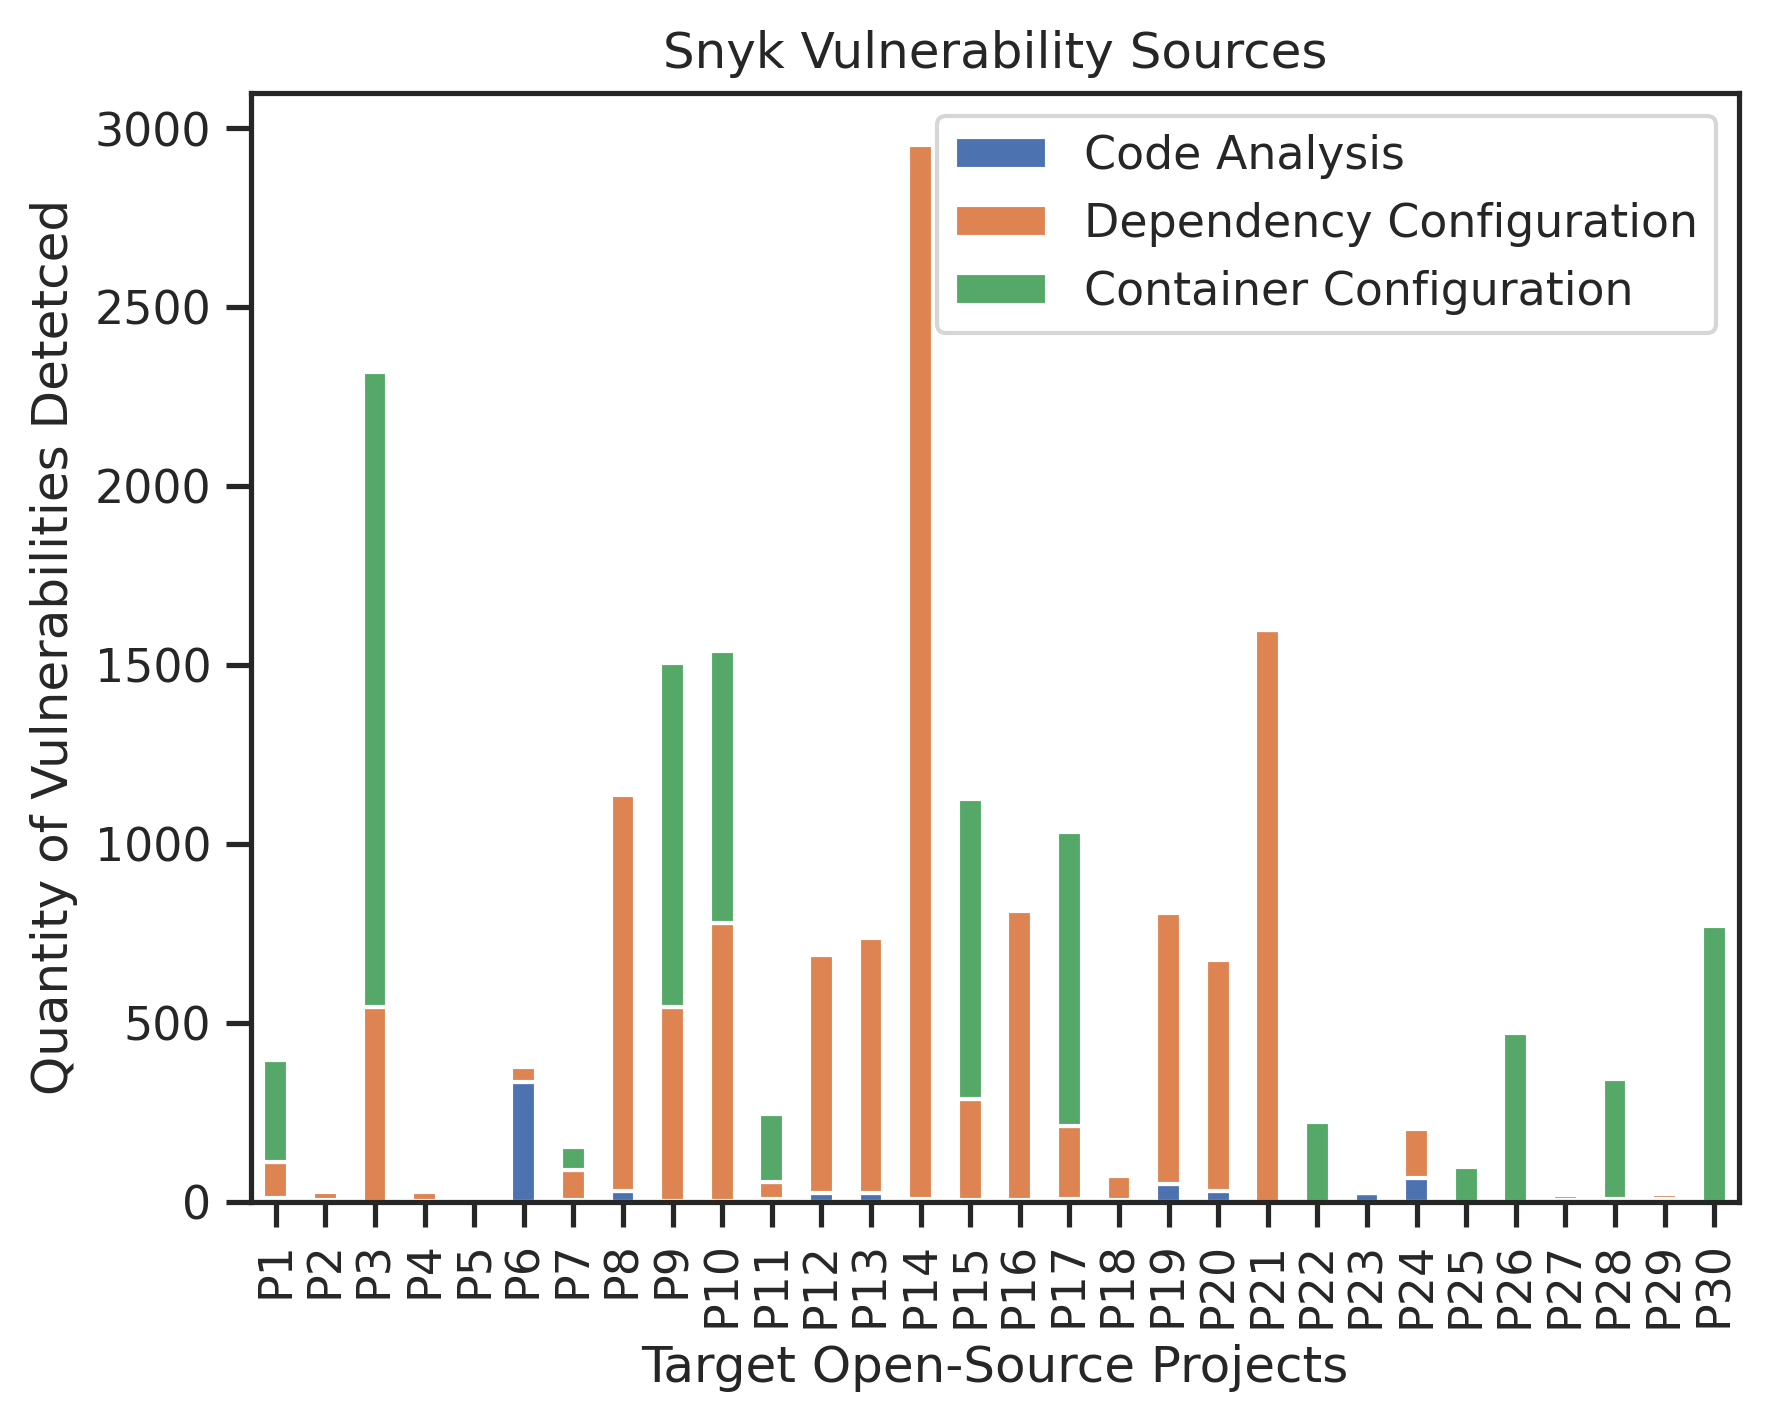

In [5]:
categories = pd.read_excel('Snyk-vs-Sources.ods', engine='odf', na_values=["-"])
categories = categories.set_index('Target Open-Source Projects')


categories['Code Analysis'].plot(kind="bar", stacked=True)
categories.plot(kind="bar", stacked=True)
plt.title("Snyk Vulnerability Sources")
plt.xlabel("Target Open-Source Projects")
plt.ylabel("Quantity of Vulnerabilities Detetced")

In [4]:
categories = pd.read_excel('Snyk-vs-Sources.ods', engine='odf', na_values=["-"])
categories = categories.set_index('Target Open-Source Projects')
categories = categories.replace(np.nan,0)
stacked_data = categories.apply(lambda x: x*100/sum(x), axis=1)
stacked_data.plot(kind="bar", stacked=True)
plt.title("Snyk Vulnerability Category Percentage")
plt.xlabel("Projects")
plt.ylabel("Percentage Vulnerability Category (%)")

NameError: name 'pd' is not defined

In [5]:
categories = pd.read_excel('Snyk-vs-Sources.ods', engine='odf', na_values=["-"])
categories = categories.set_index('Target Open-Source Projects')
categories =  categories.dropna()
stacked_data = categories.apply(lambda x: x*100/sum(x), axis=1)
stacked_data.plot(kind="bar", stacked=True)
plt.title("Snyk Vulnerability Category Percentage - Droppped entries with no Dockerfiles")
plt.xlabel("Projects")
plt.ylabel("Percentage Vulnerability Category (%)")

NameError: name 'pd' is not defined

Text(0, 0.5, 'Percentage Vulnerability Category (%)')

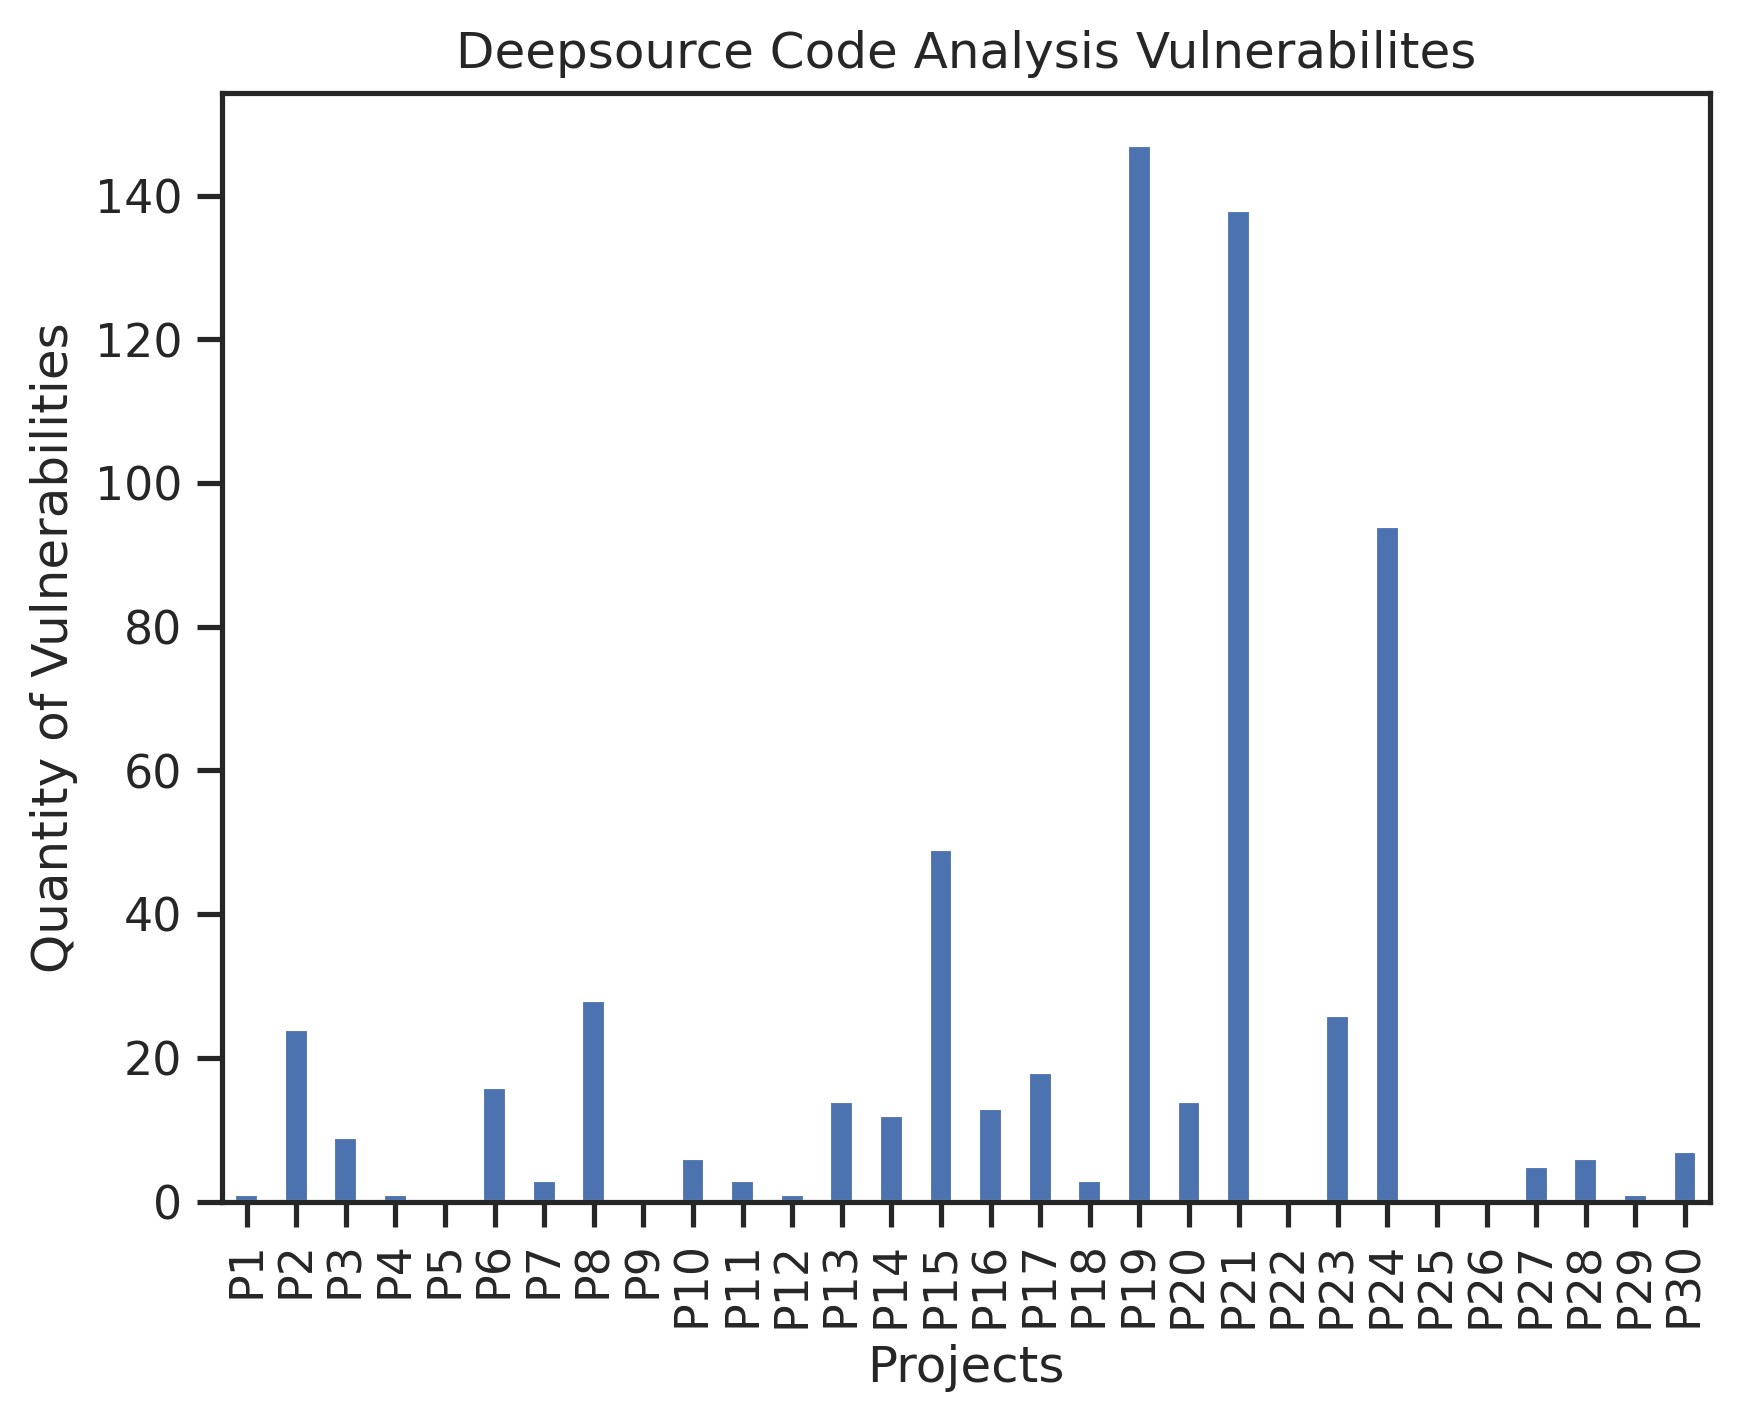

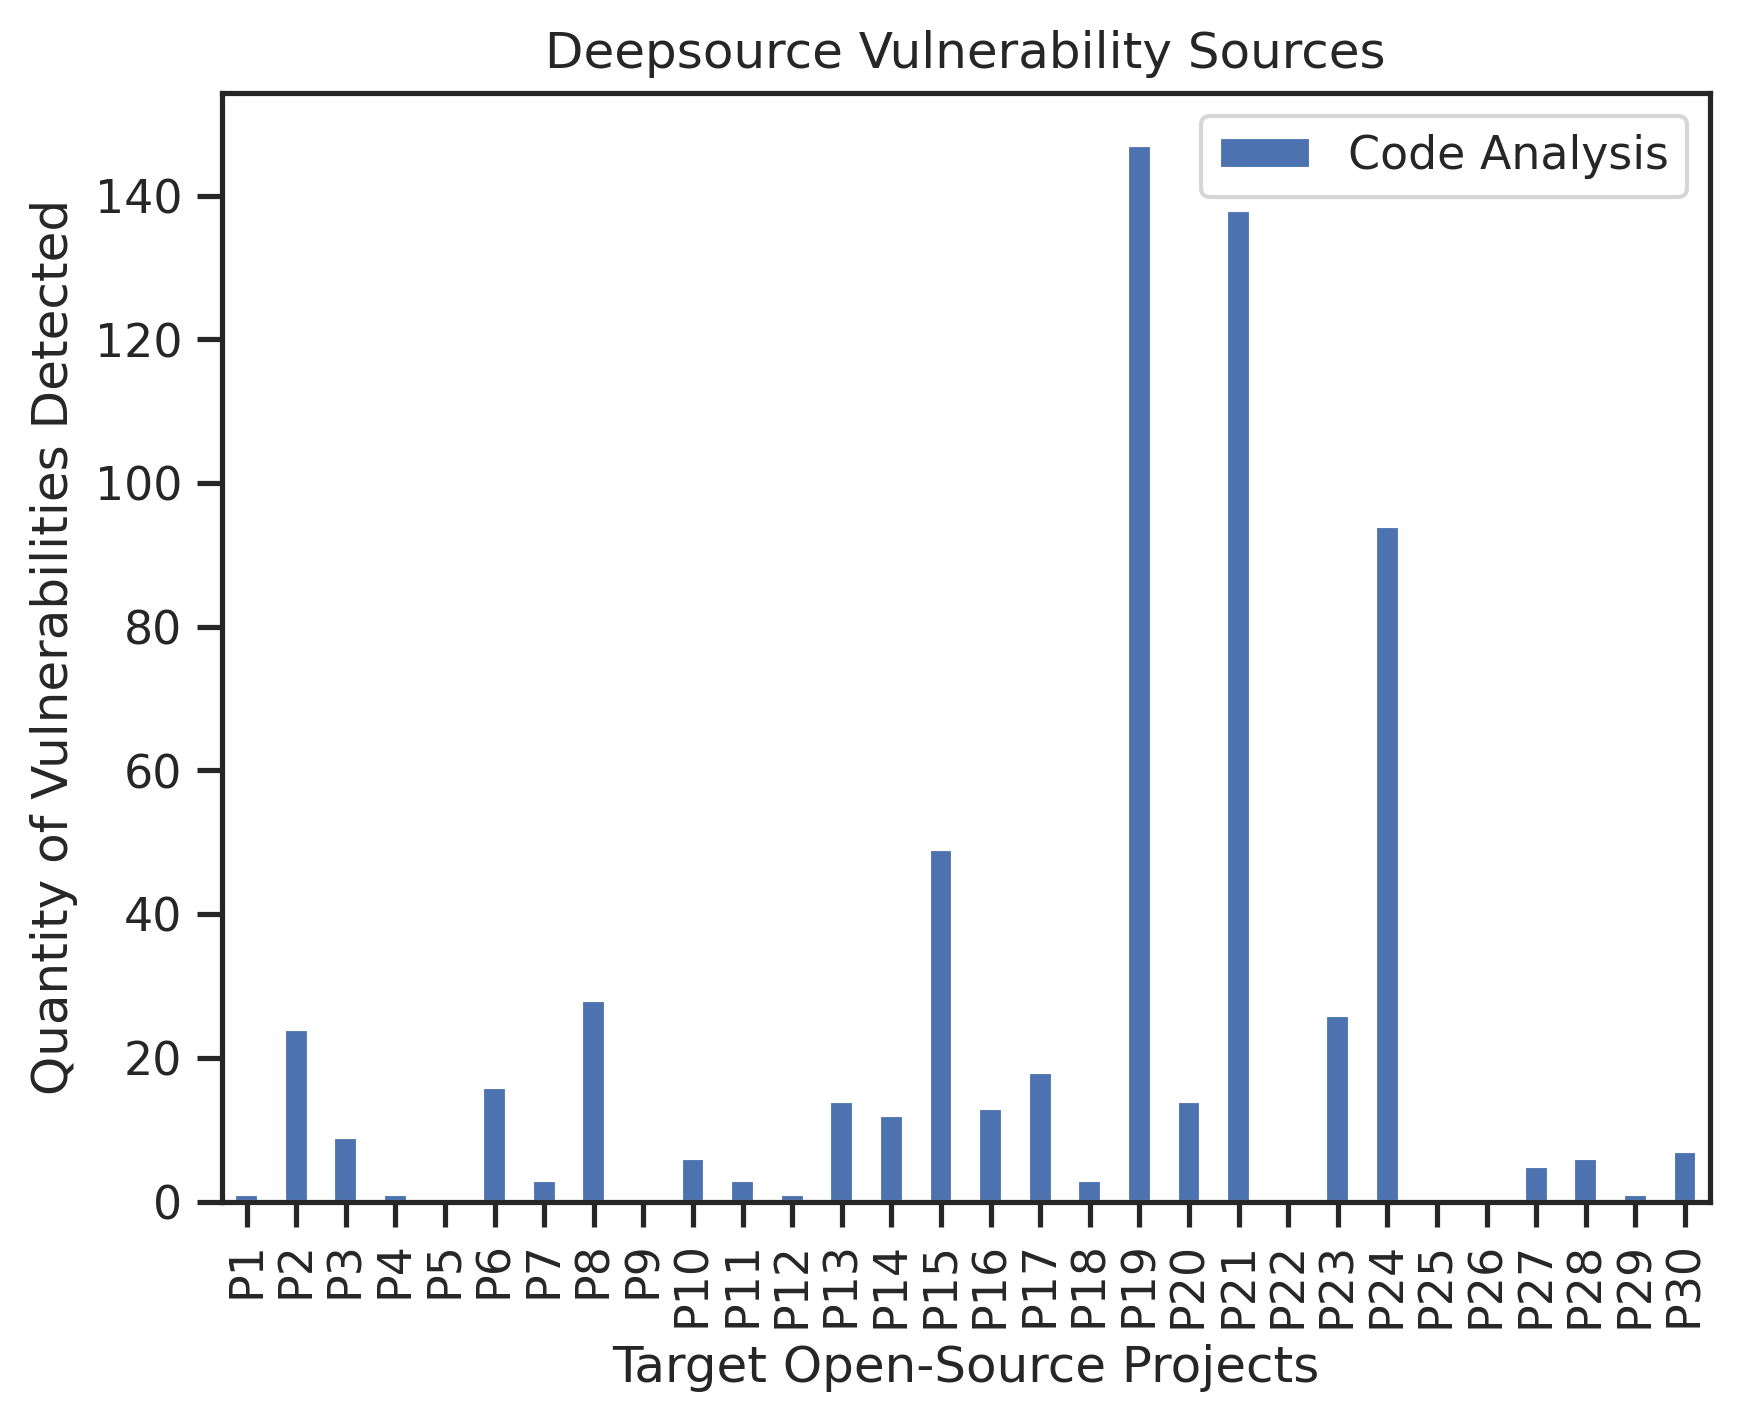

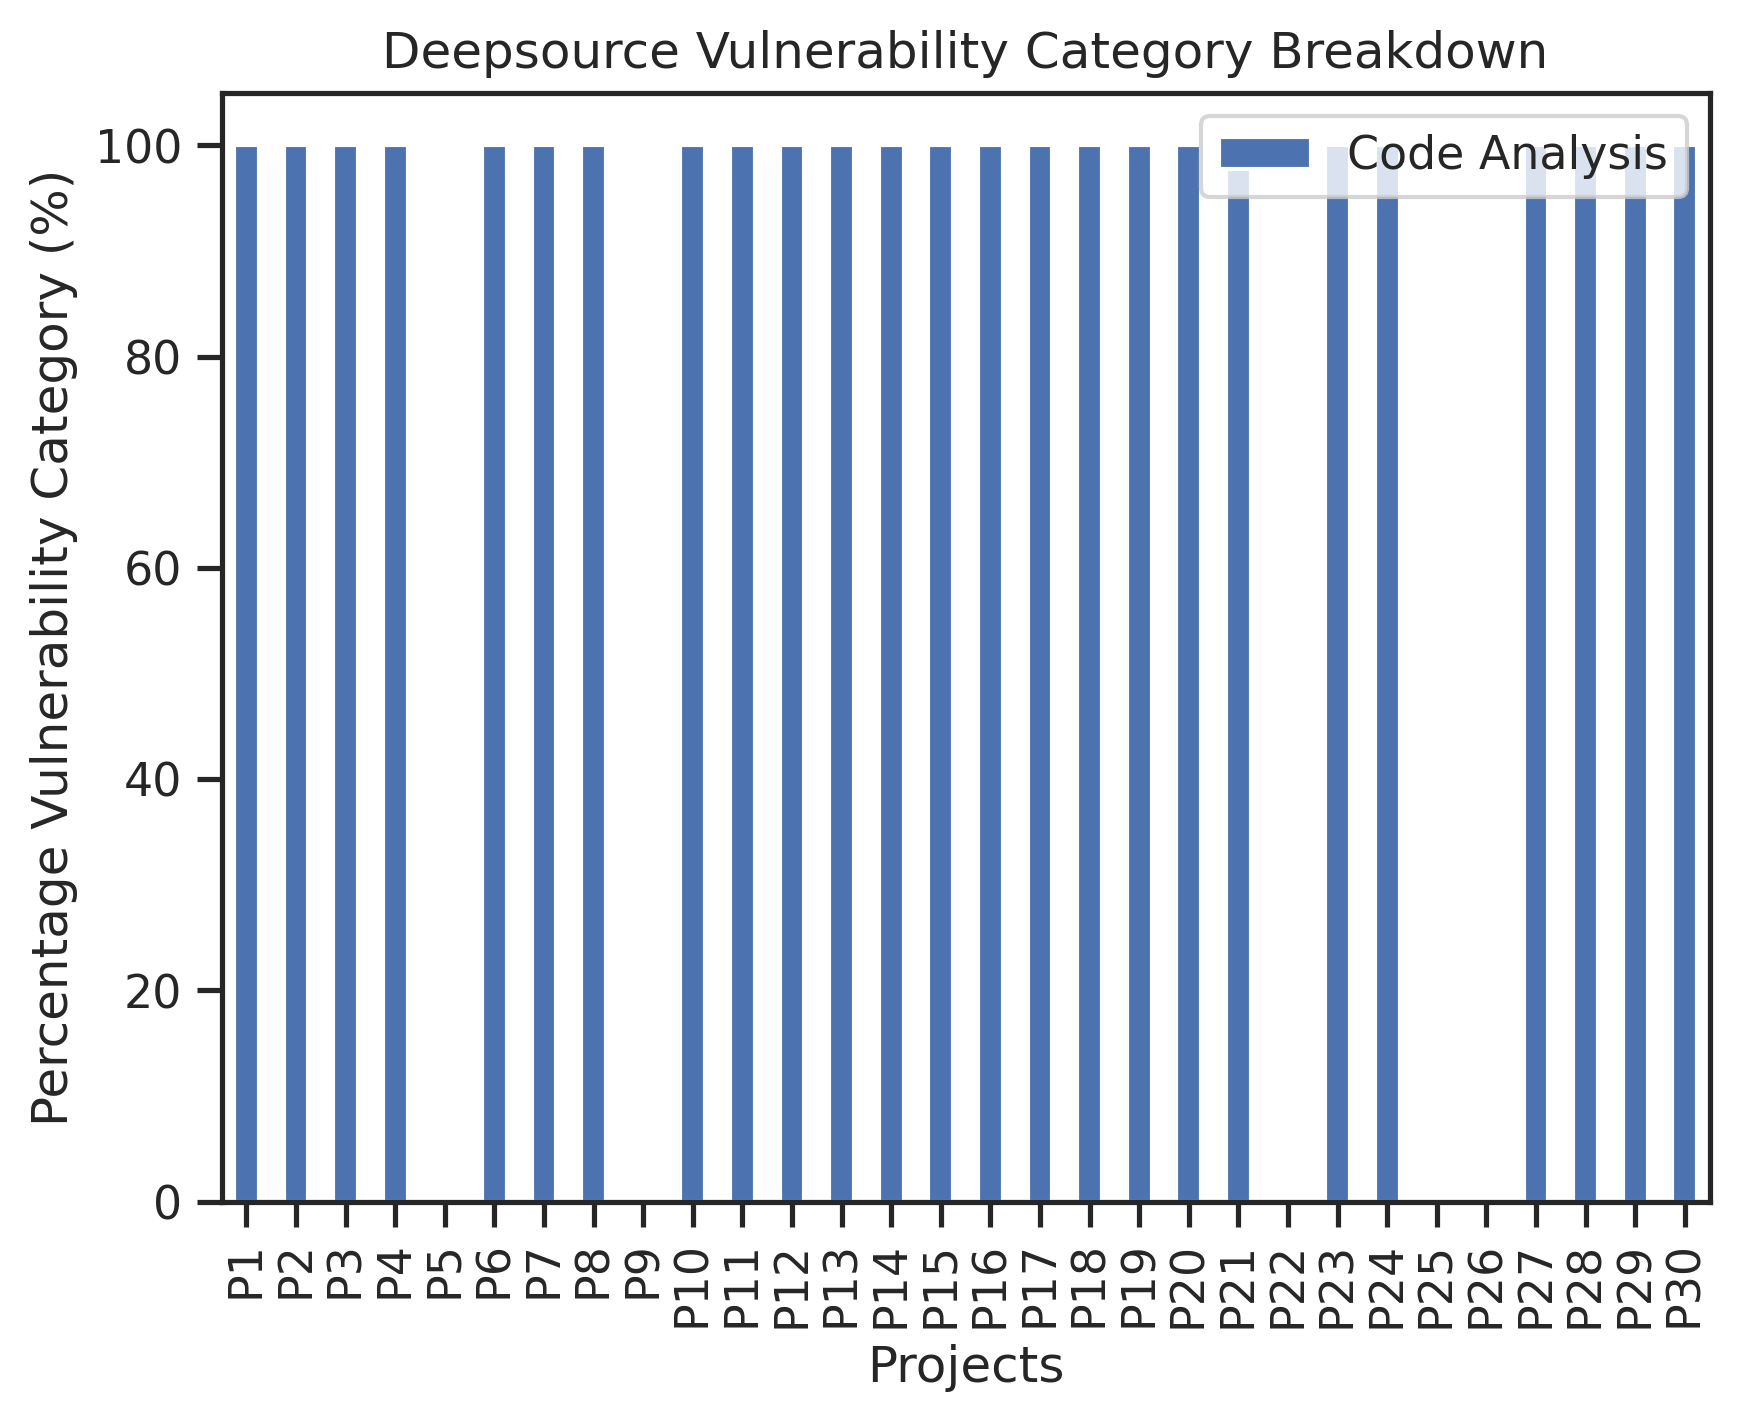

In [8]:
categories = pd.read_excel('Deepsource-vs-Sources.ods', engine='odf', na_values=["-"])
categories = categories.replace(np.nan,0)
categories = categories.set_index('Target Open-Source Projects')
categories = categories[['Code Analysis']]

categories['Code Analysis'].plot(kind="bar", stacked=True)
plt.title("Deepsource Code Analysis Vulnerabilites")
plt.xlabel("Projects")
plt.ylabel("Quantity of Vulnerabilities")

categories.plot(kind="bar", stacked=True)
plt.title("Deepsource Vulnerability Sources")
plt.xlabel("Target Open-Source Projects")
plt.ylabel("Quantity of Vulnerabilities Detected")

stacked_data = categories.apply(lambda x: x*100/sum(x), axis=1)
stacked_data.plot(kind="bar", stacked=True)
plt.title("Deepsource Vulnerability Category Breakdown")
plt.xlabel("Projects")
plt.ylabel("Percentage Vulnerability Category (%)")

TypeError: unsupported operand type(s) for +: 'int' and 'str'

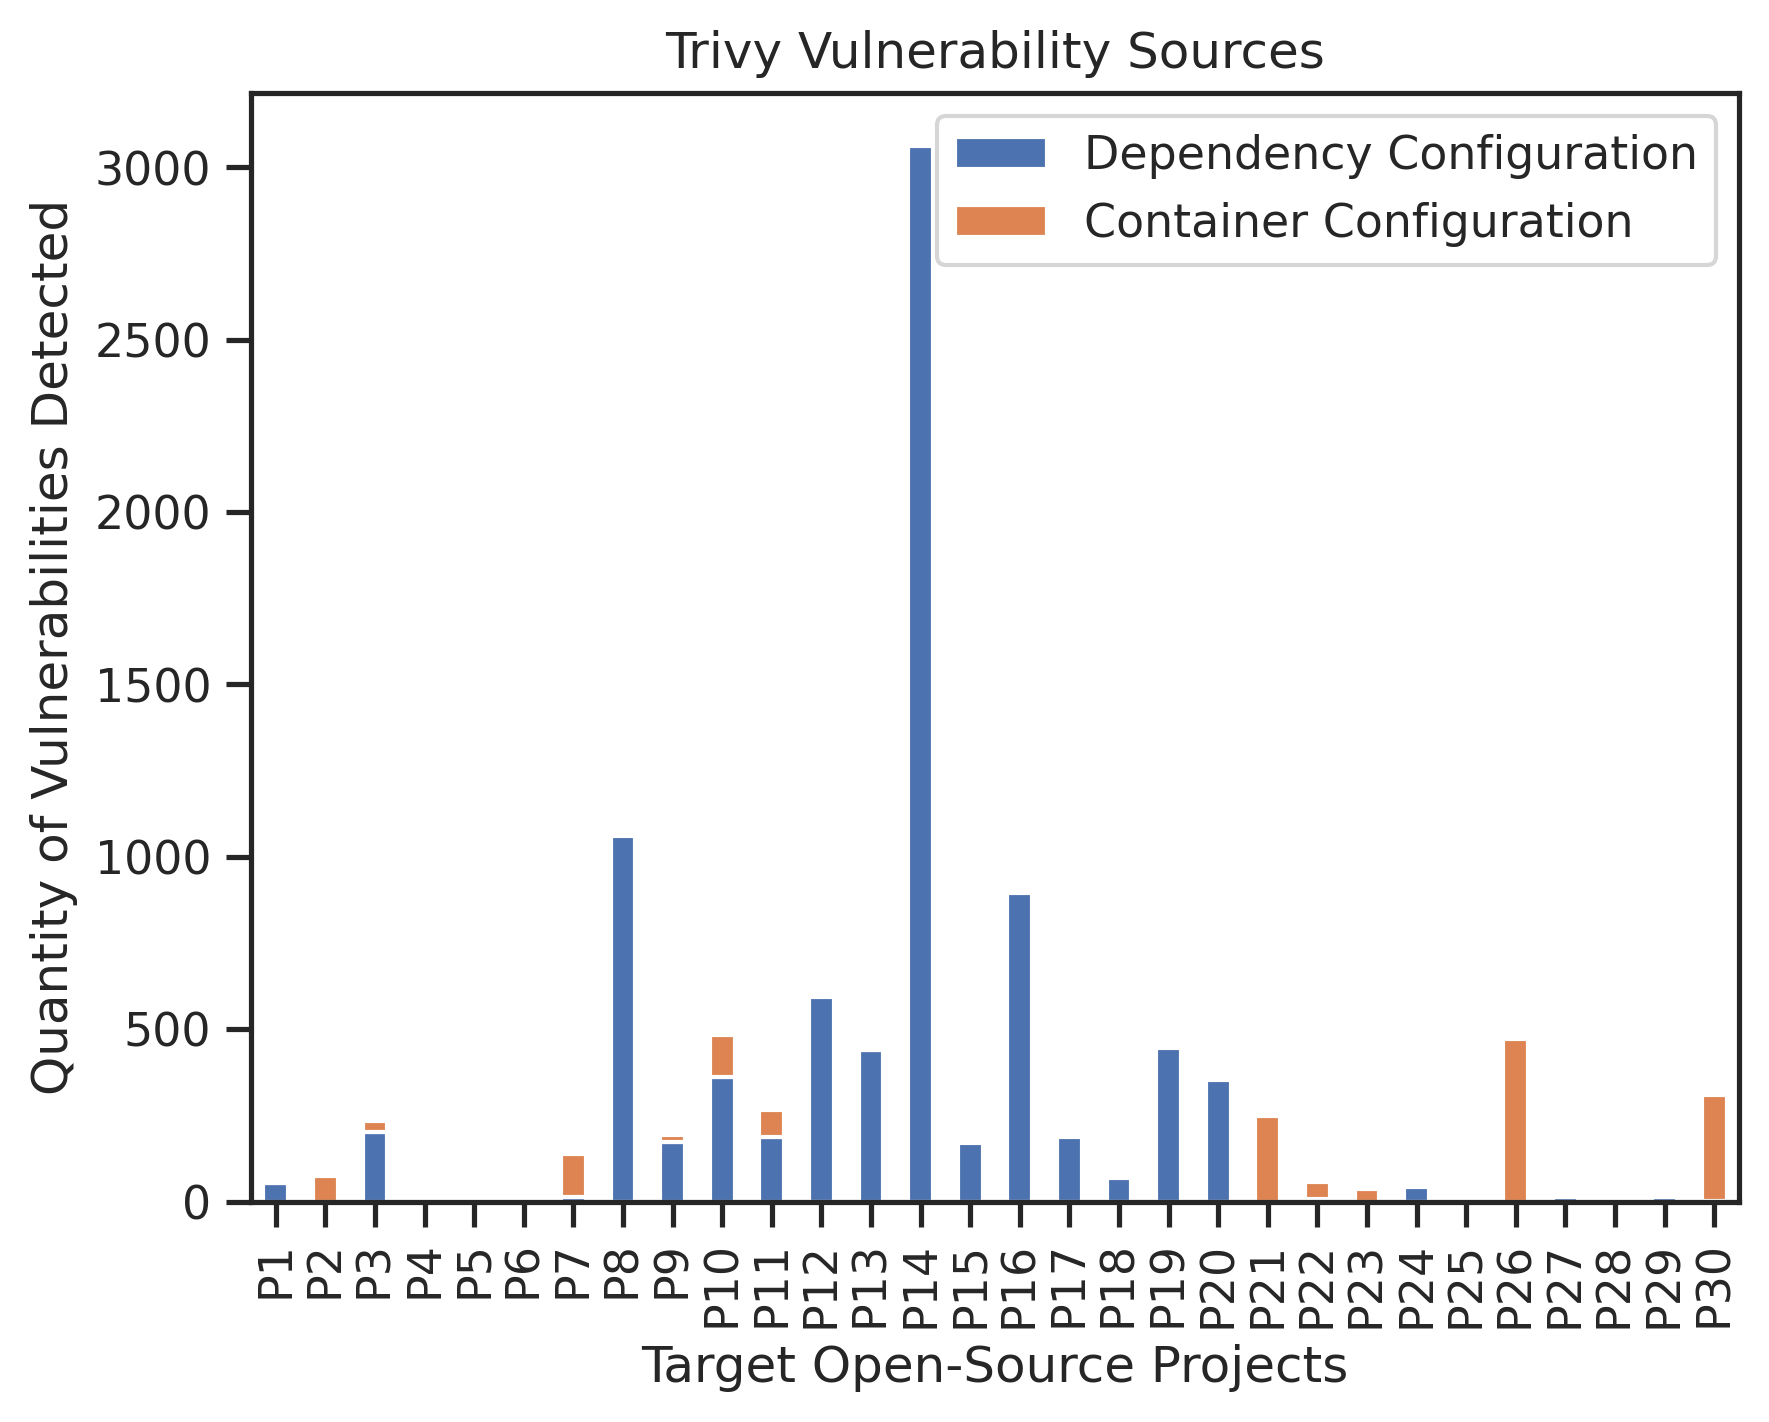

In [10]:
categories = pd.read_excel('Trivy-vs-Sources.ods', engine='odf', na_values=["-"])
categories = categories.replace(np.nan,0)
categories = categories.set_index('Target Open-Source Projects')

categories

categories.plot(kind="bar", stacked=True)
plt.title("Trivy Vulnerability Sources")
plt.xlabel("Target Open-Source Projects")
plt.ylabel("Quantity of Vulnerabilities Detected")

stacked_data = categories.apply(lambda x: x*100/sum(x), axis=1)
stacked_data.plot(kind="bar", stacked=True)
plt.title("Trivy Vulnerability Category Breakdown")
plt.xlabel("Target Open-Source Projects")
plt.ylabel("Percentage Vulnerability Category (%)")

Text(0, 0.5, 'Percentage Vulnerability Category (%)')

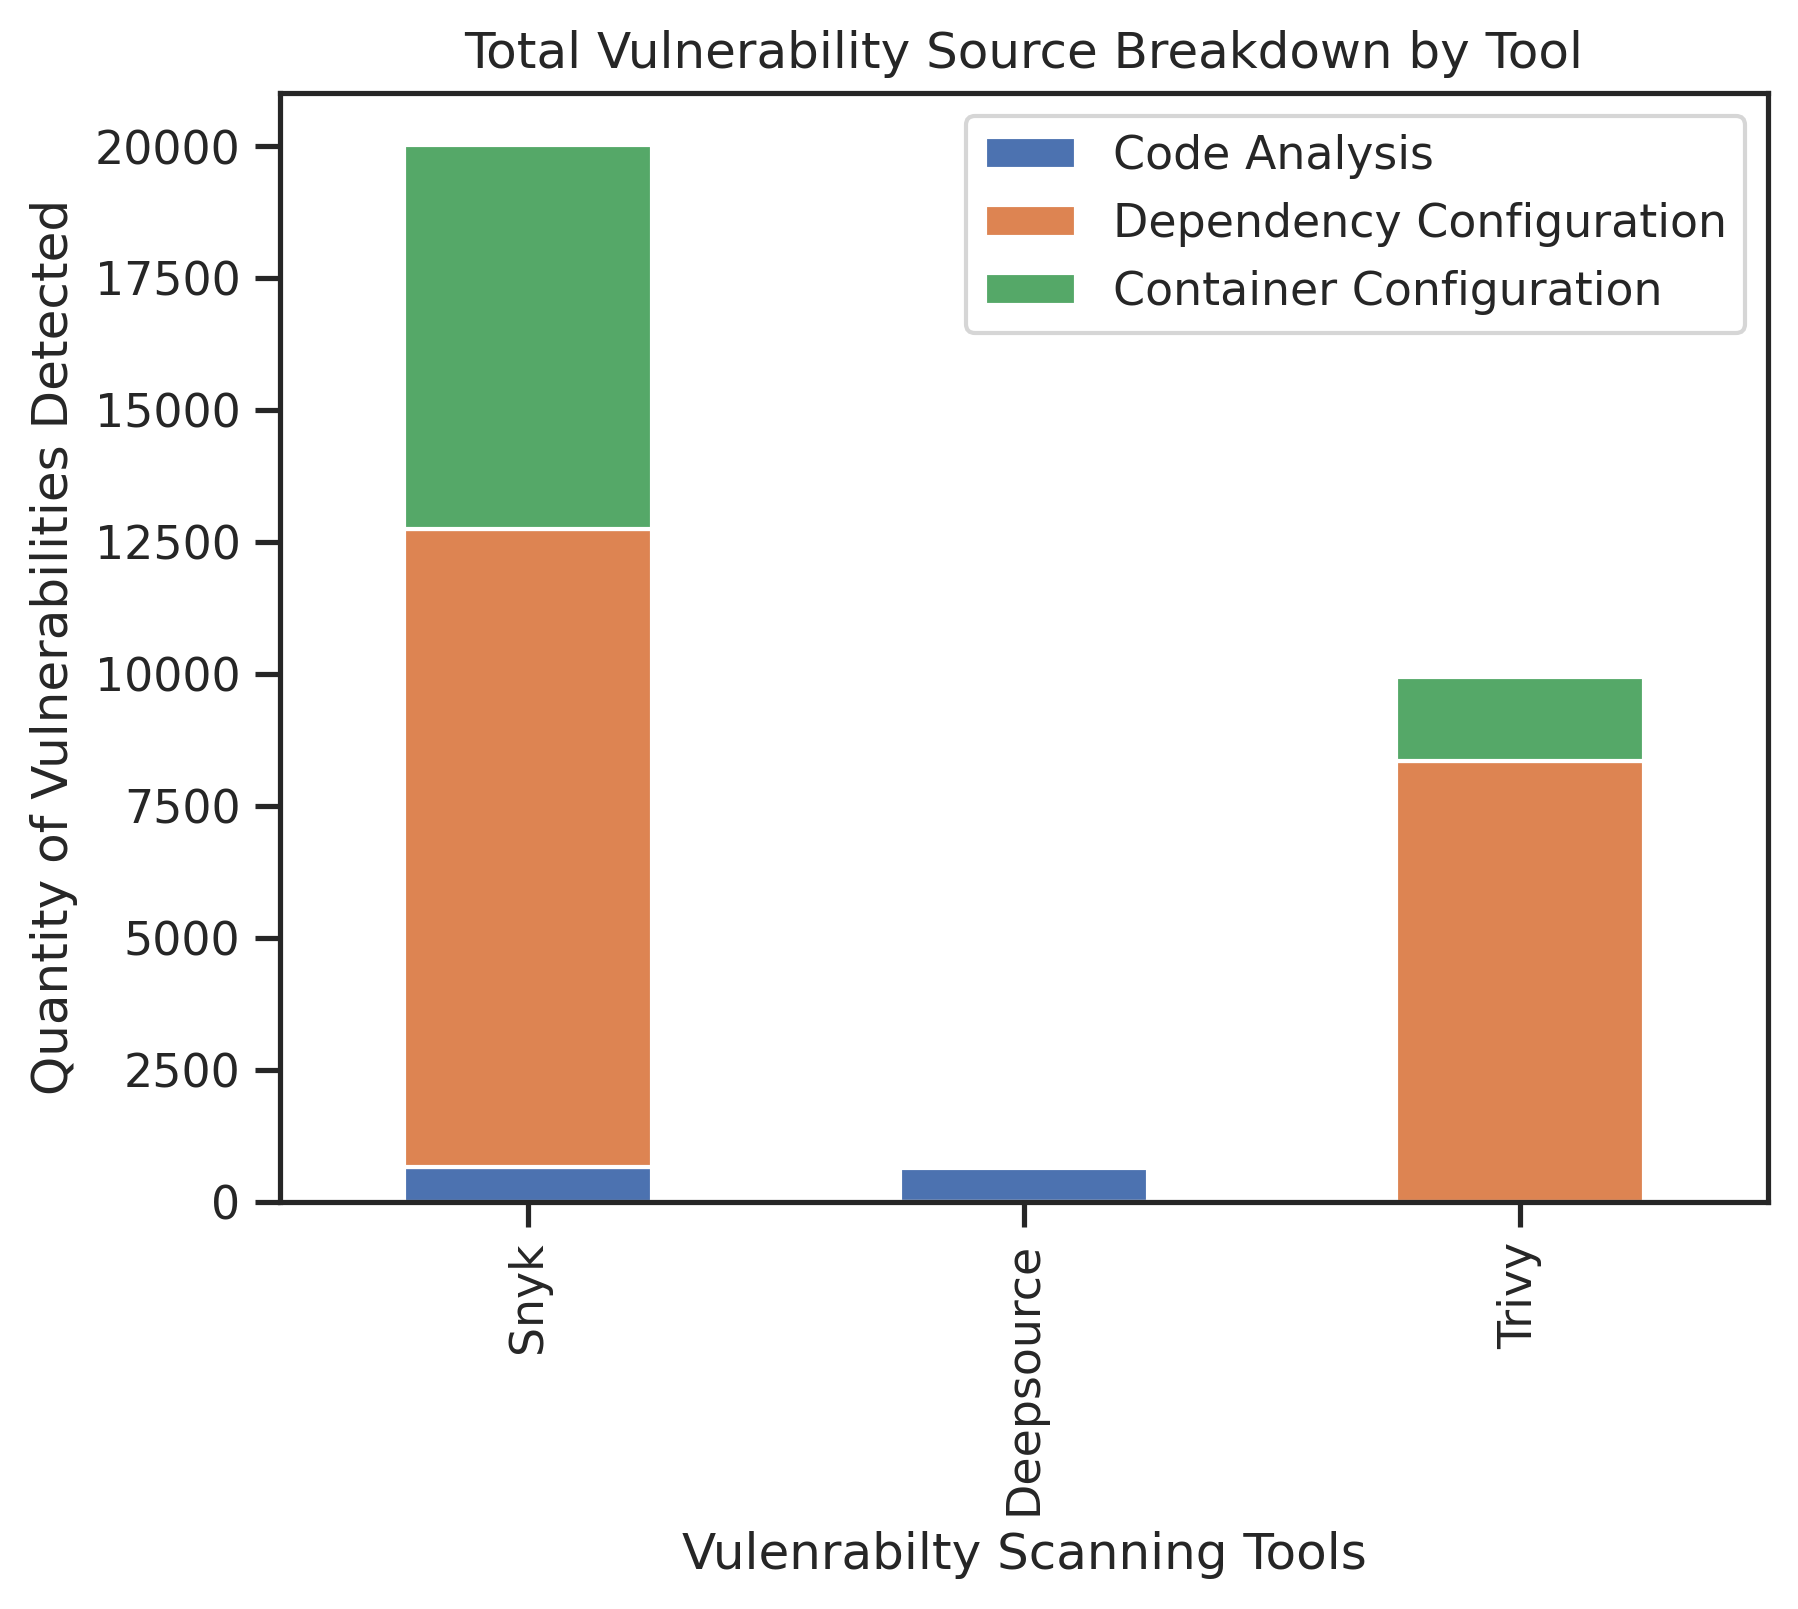

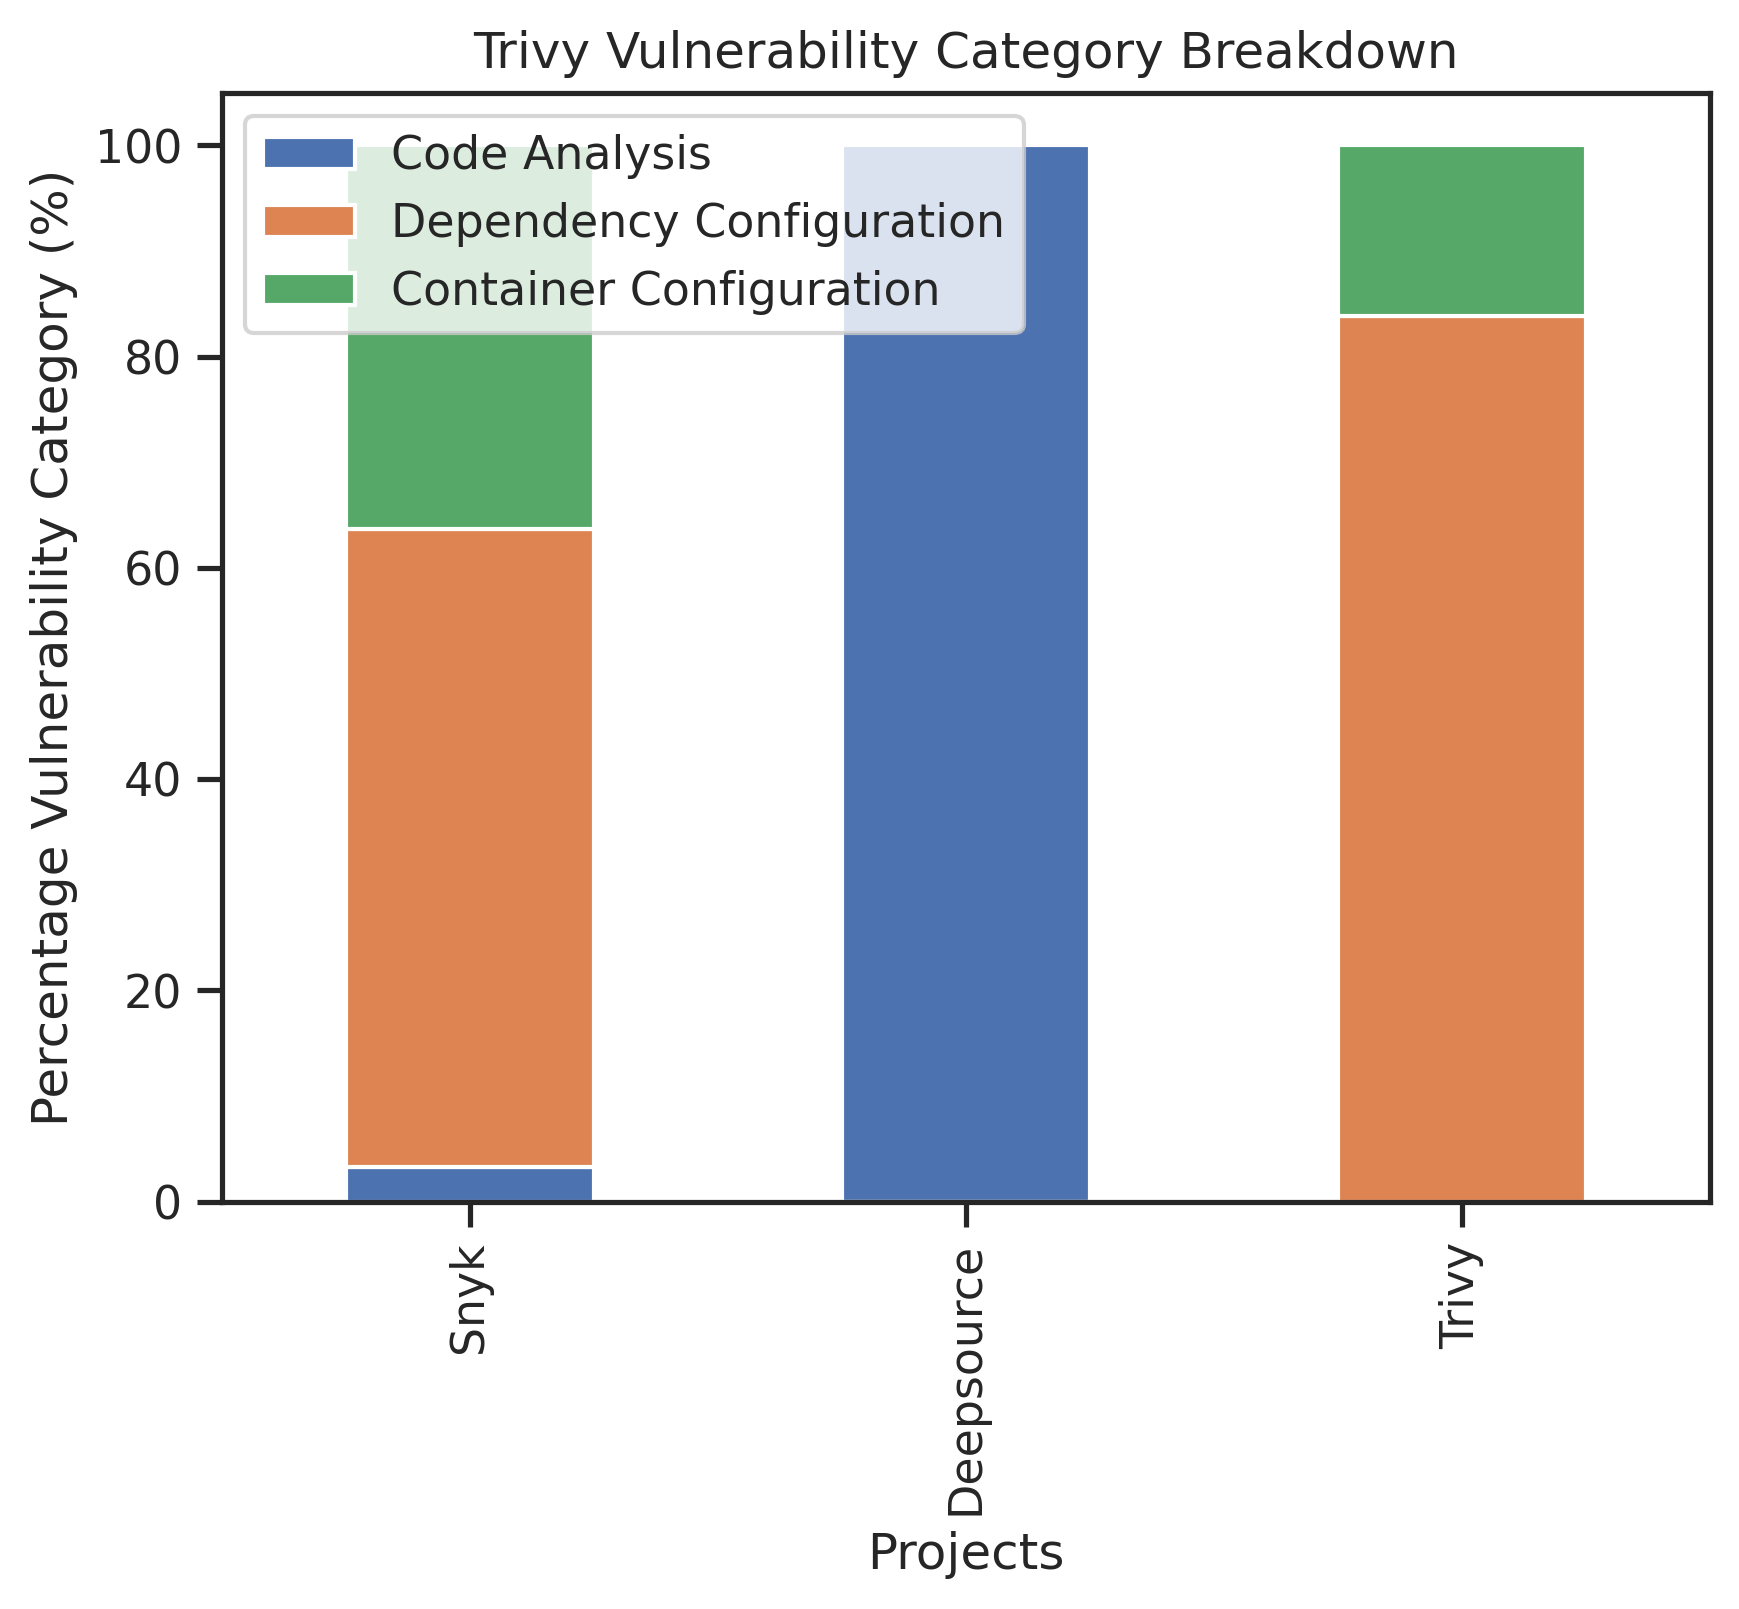

In [11]:
categories = pd.read_excel('Tool-vs-Source.ods', engine='odf', na_values=["-"])
categories = categories.replace(np.nan,0)
categories = categories.set_index('Tool')

categories

categories.plot(kind="bar", stacked=True)
plt.title("Total Vulnerability Source Breakdown by Tool")
plt.xlabel("Vulenrabilty Scanning Tools")
plt.ylabel("Quantity of Vulnerabilities Detected")

stacked_data = categories.apply(lambda x: x*100/sum(x), axis=1)
stacked_data.plot(kind="bar", stacked=True)
plt.title("Trivy Vulnerability Category Breakdown")
plt.xlabel("Projects")
plt.ylabel("Percentage Vulnerability Category (%)")

Text(0.5, 0, 'Quantity of Vulnerabilties Detected by Each Tool')

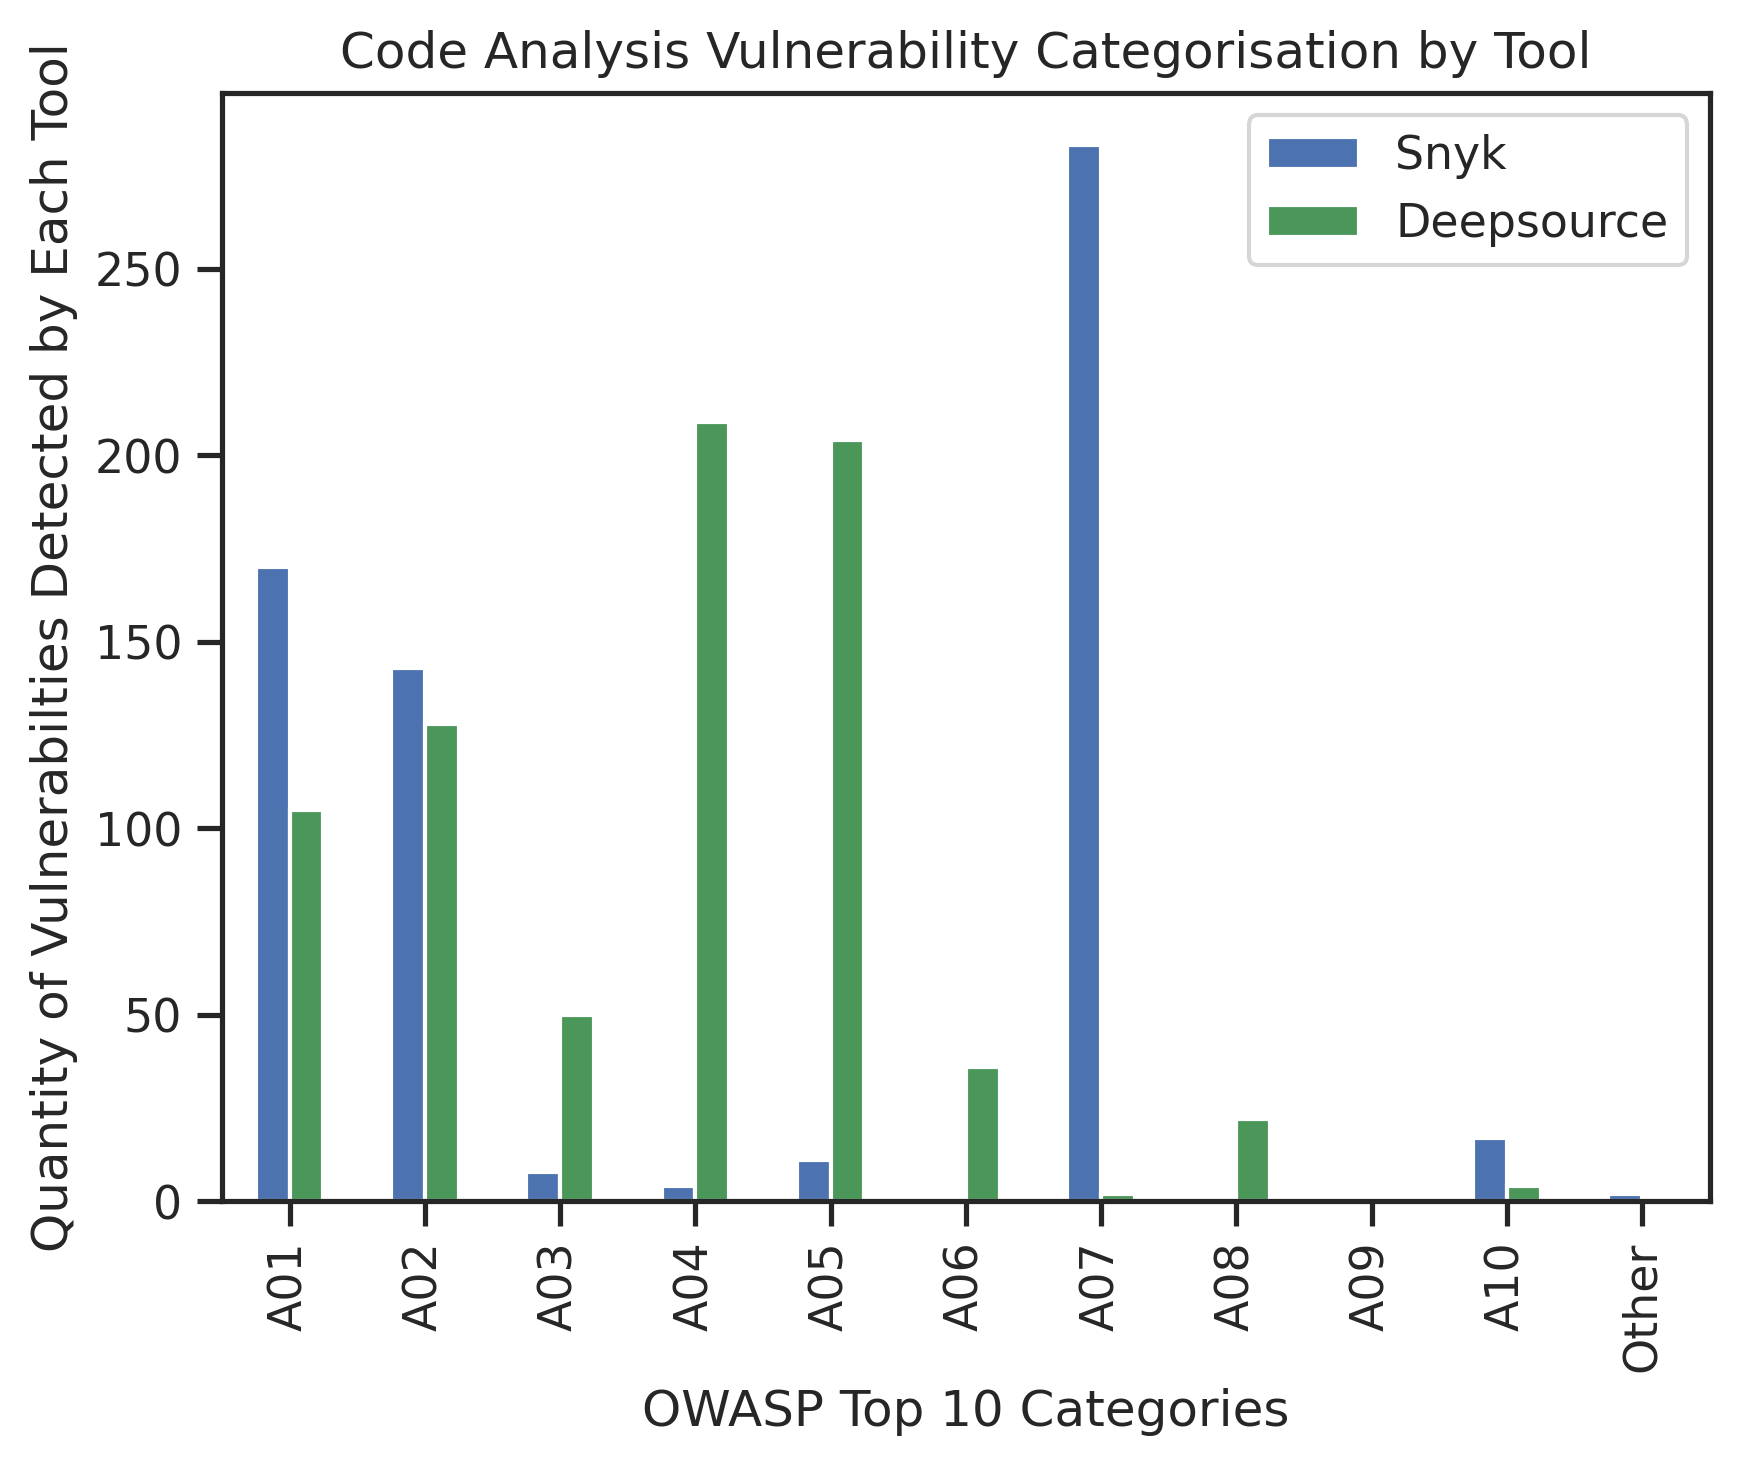

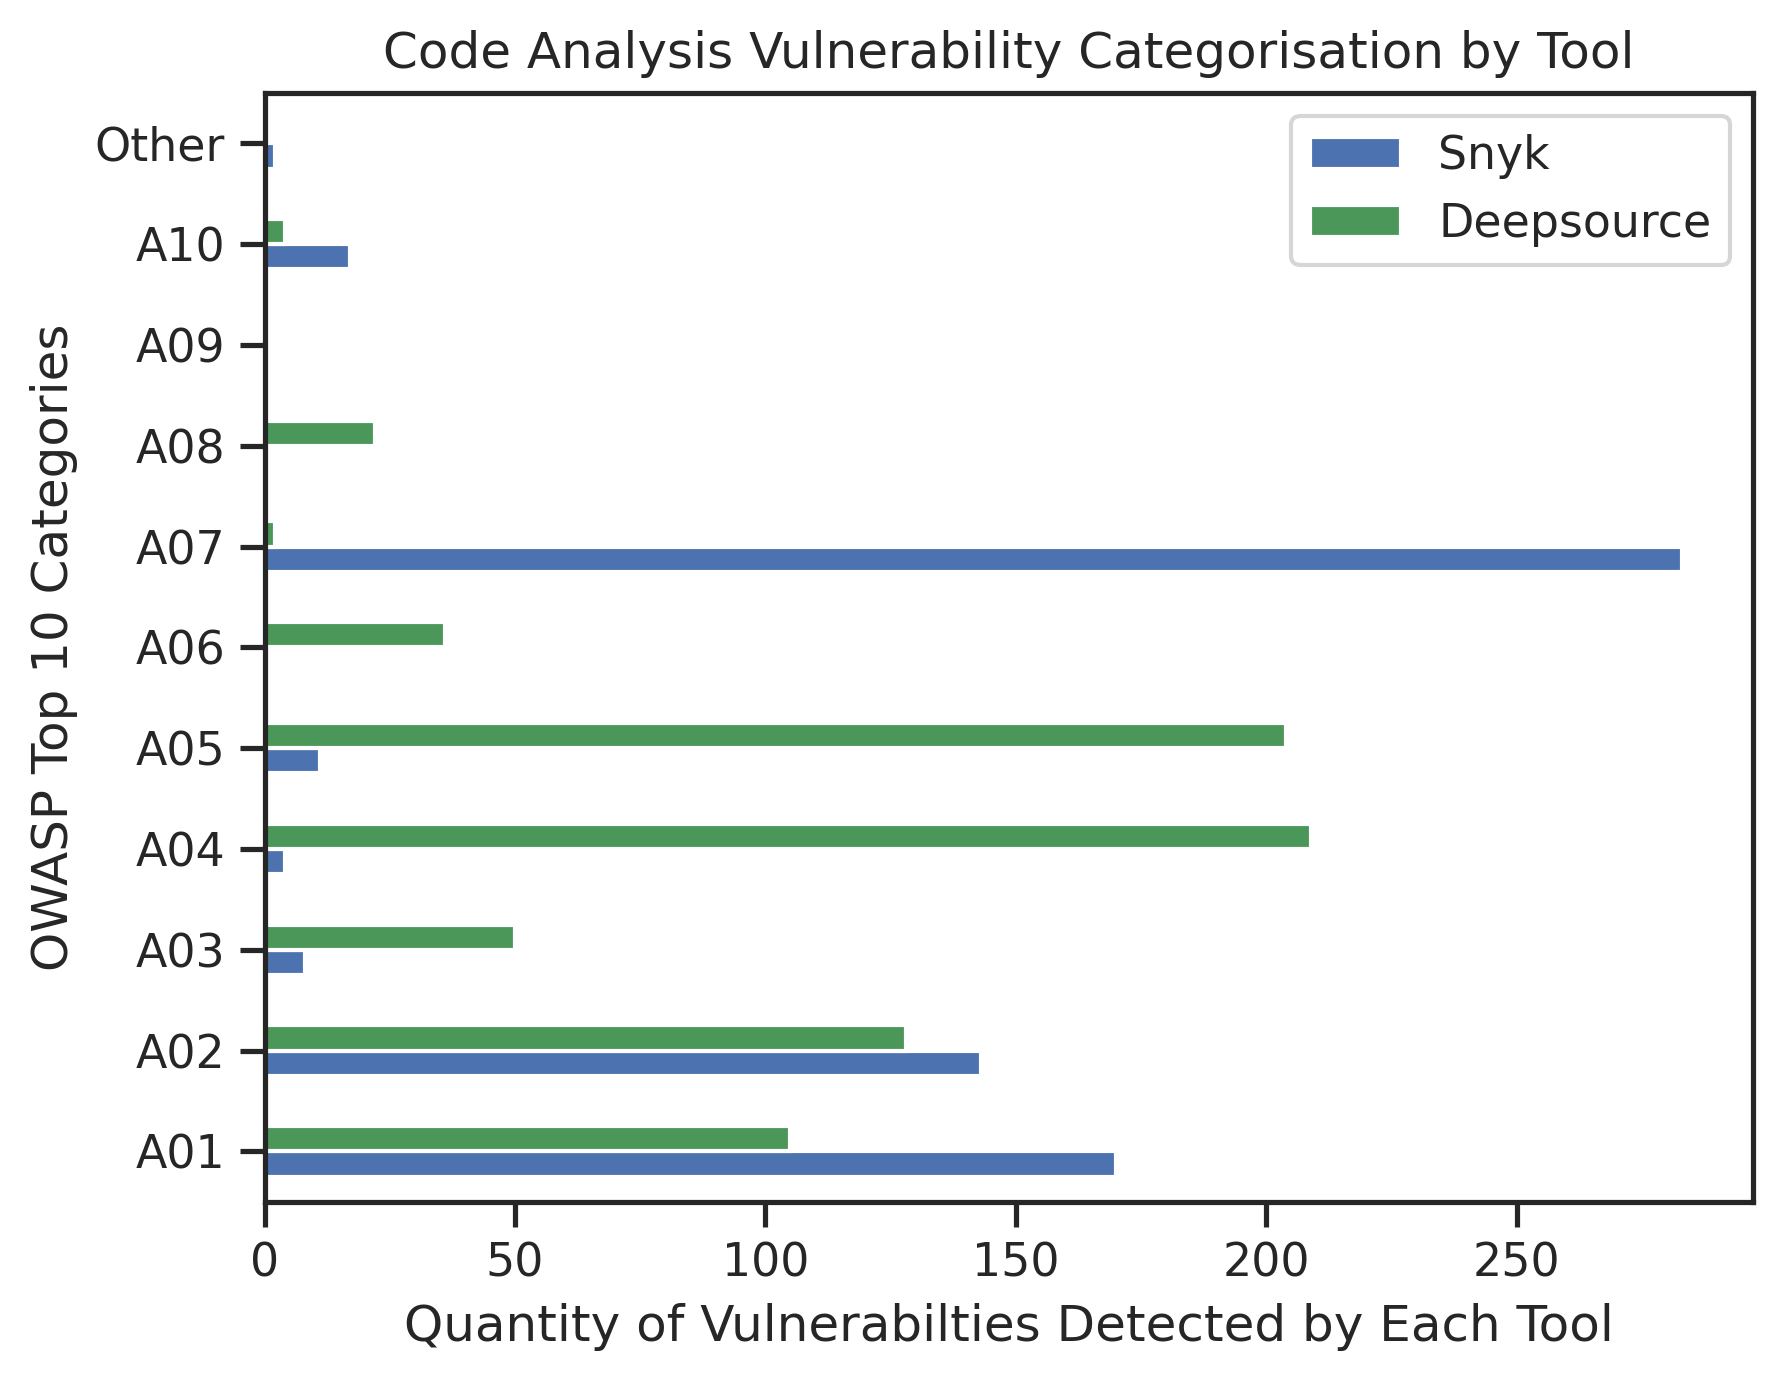

In [13]:
categories = pd.read_excel('OWASP-vs-Tools.ods', engine='odf', na_values=["-"])
categories = categories.set_index('Code')

categories = categories[['Snyk','Deepsource']]

categories.plot(kind="bar", color=('C0', '#4B975A'))

plt.title("Code Analysis Vulnerability Categorisation by Tool")
plt.xlabel("OWASP Top 10 Categories")
plt.ylabel("Quantity of Vulnerabilties Detected by Each Tool")

categories.plot(kind="barh", color=('C0', '#4B975A'))

plt.title("Code Analysis Vulnerability Categorisation by Tool")
plt.ylabel("OWASP Top 10 Categories")
plt.xlabel("Quantity of Vulnerabilties Detected by Each Tool")

Text(0, 0.5, 'Quantity of Vulnerabilties')

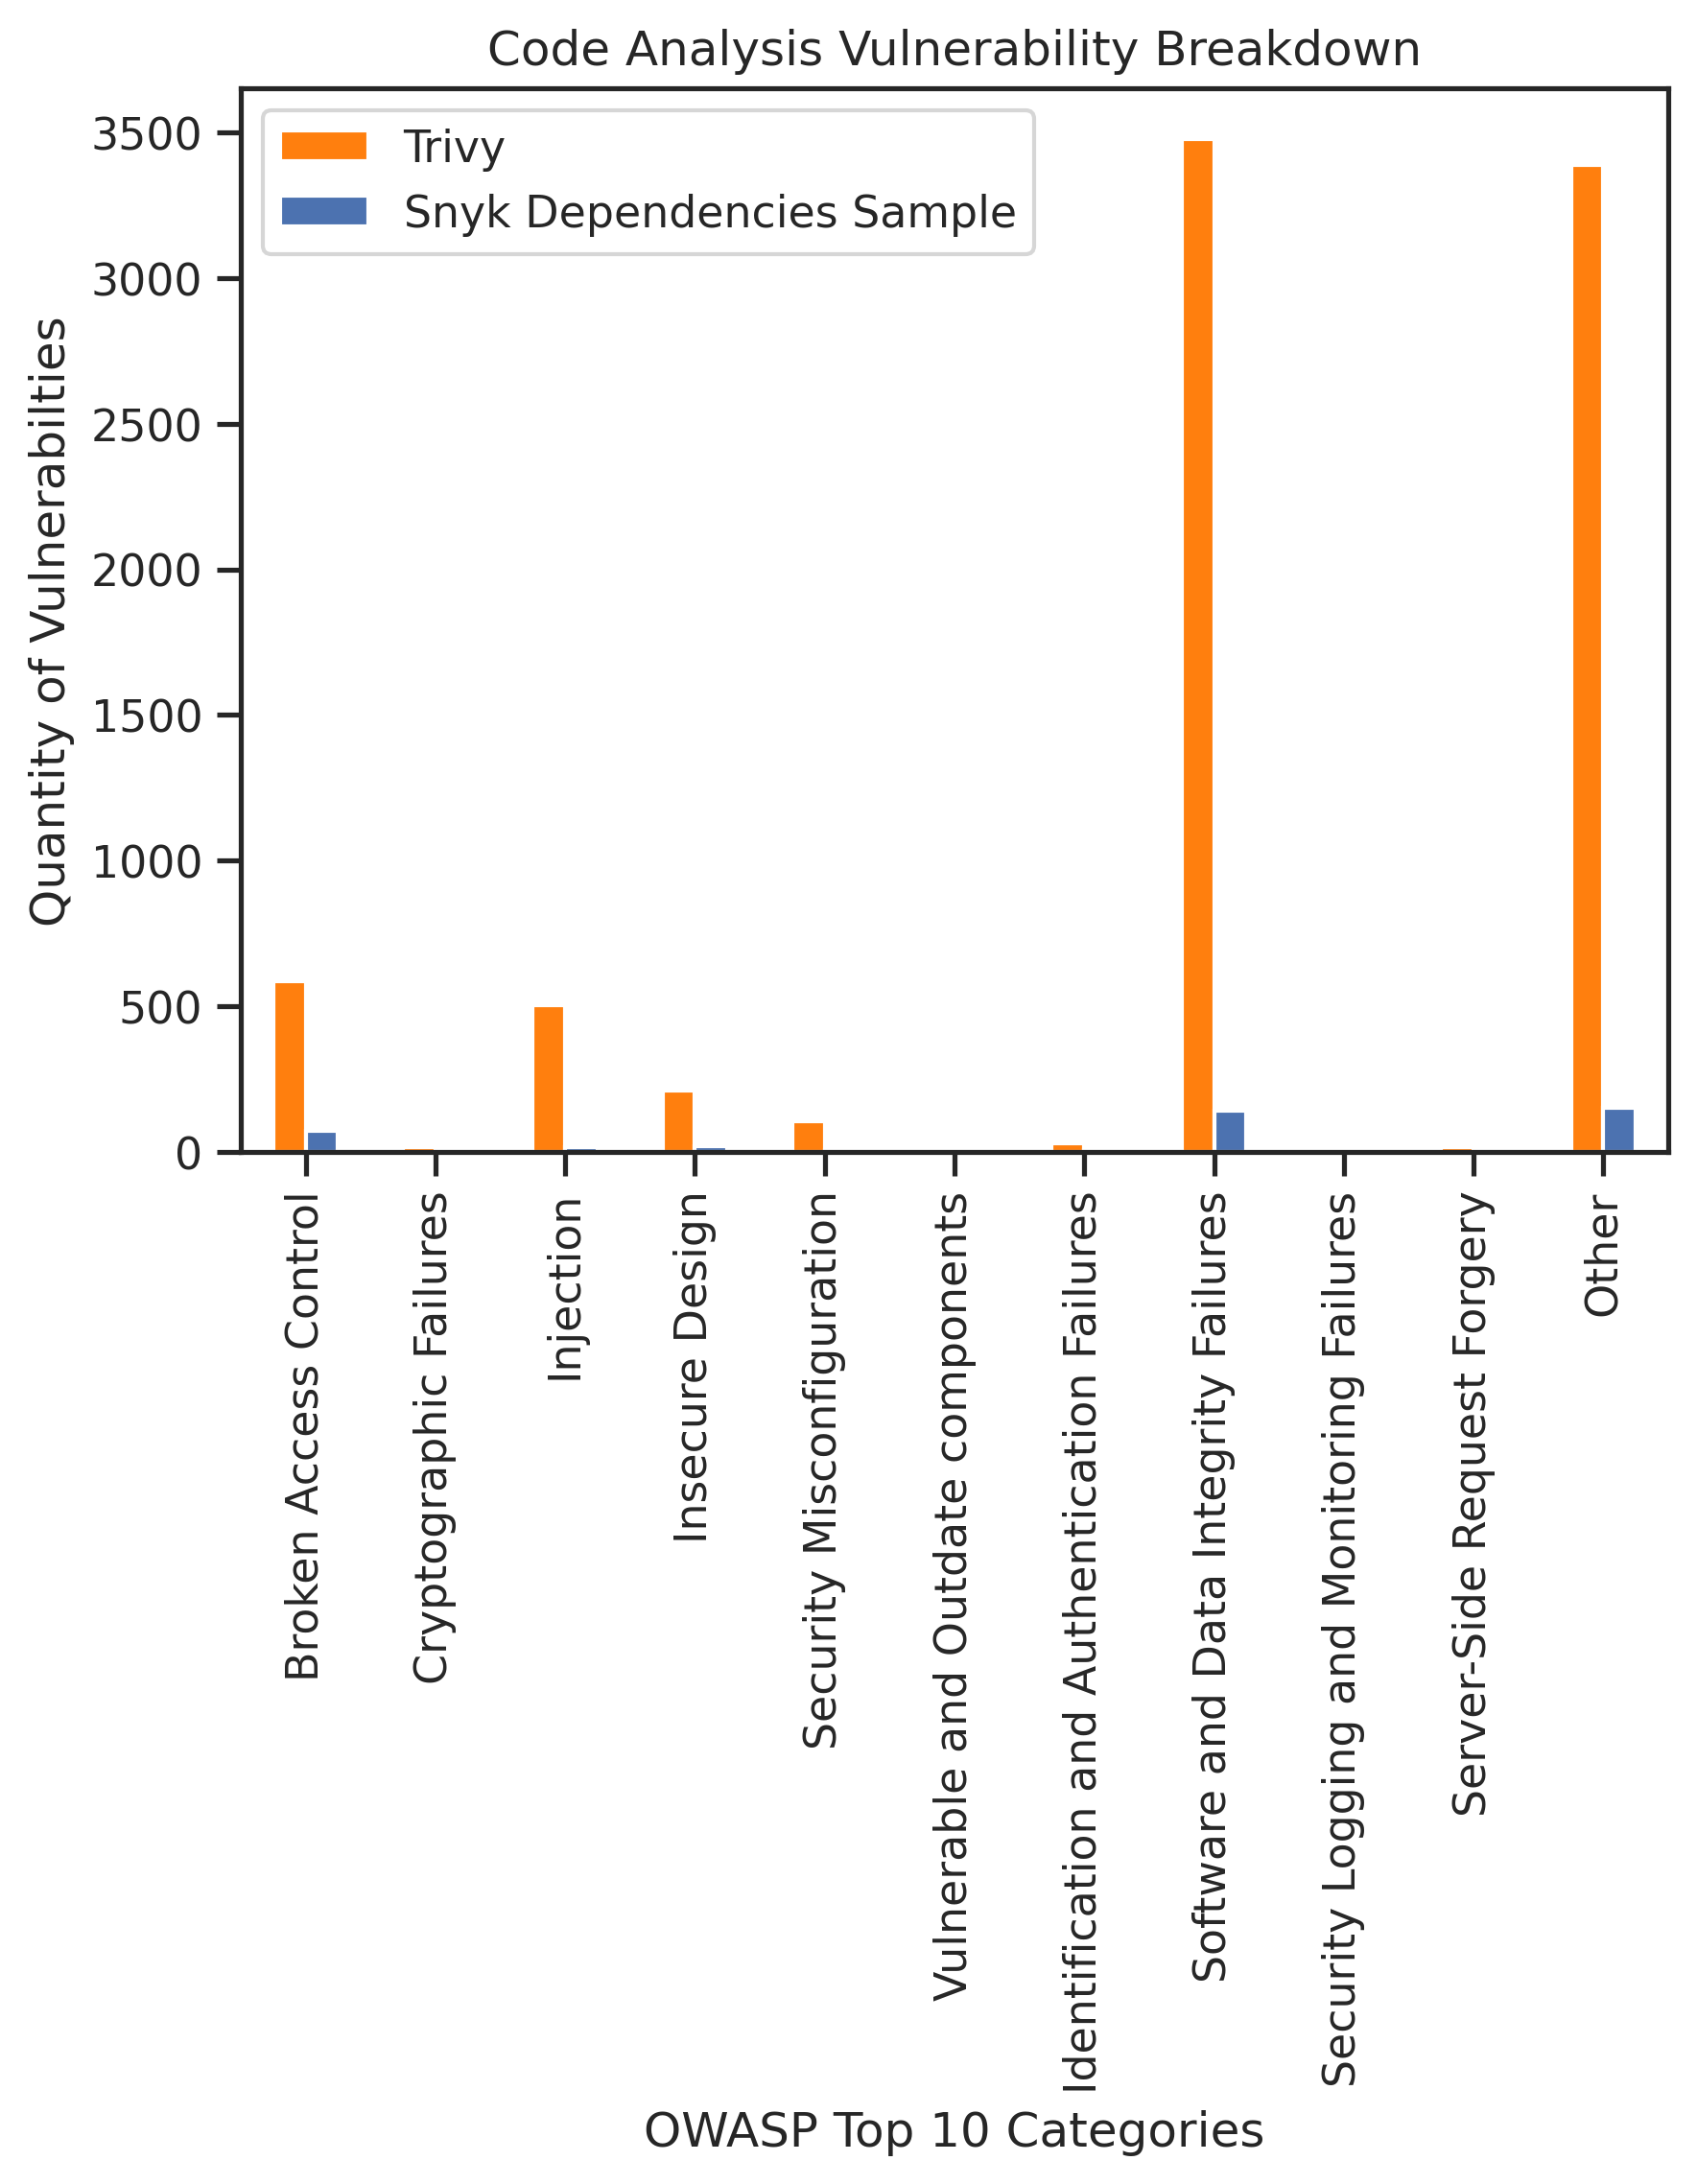

In [14]:
categories = pd.read_excel('OWASP-vs-Tools.ods', engine='odf', na_values=["-"])
categories = categories.set_index('Name')

categories = categories[['Trivy','Snyk Dependencies Sample']]

categories.plot(kind="bar", stacked=False, color=('#ff7f0e', 'C0'))

plt.title("Code Analysis Vulnerability Breakdown")
plt.xlabel("OWASP Top 10 Categories")
plt.ylabel("Quantity of Vulnerabilties")

Text(0, 0.5, 'Normalised Quantity of Vulnerabilties Detected')

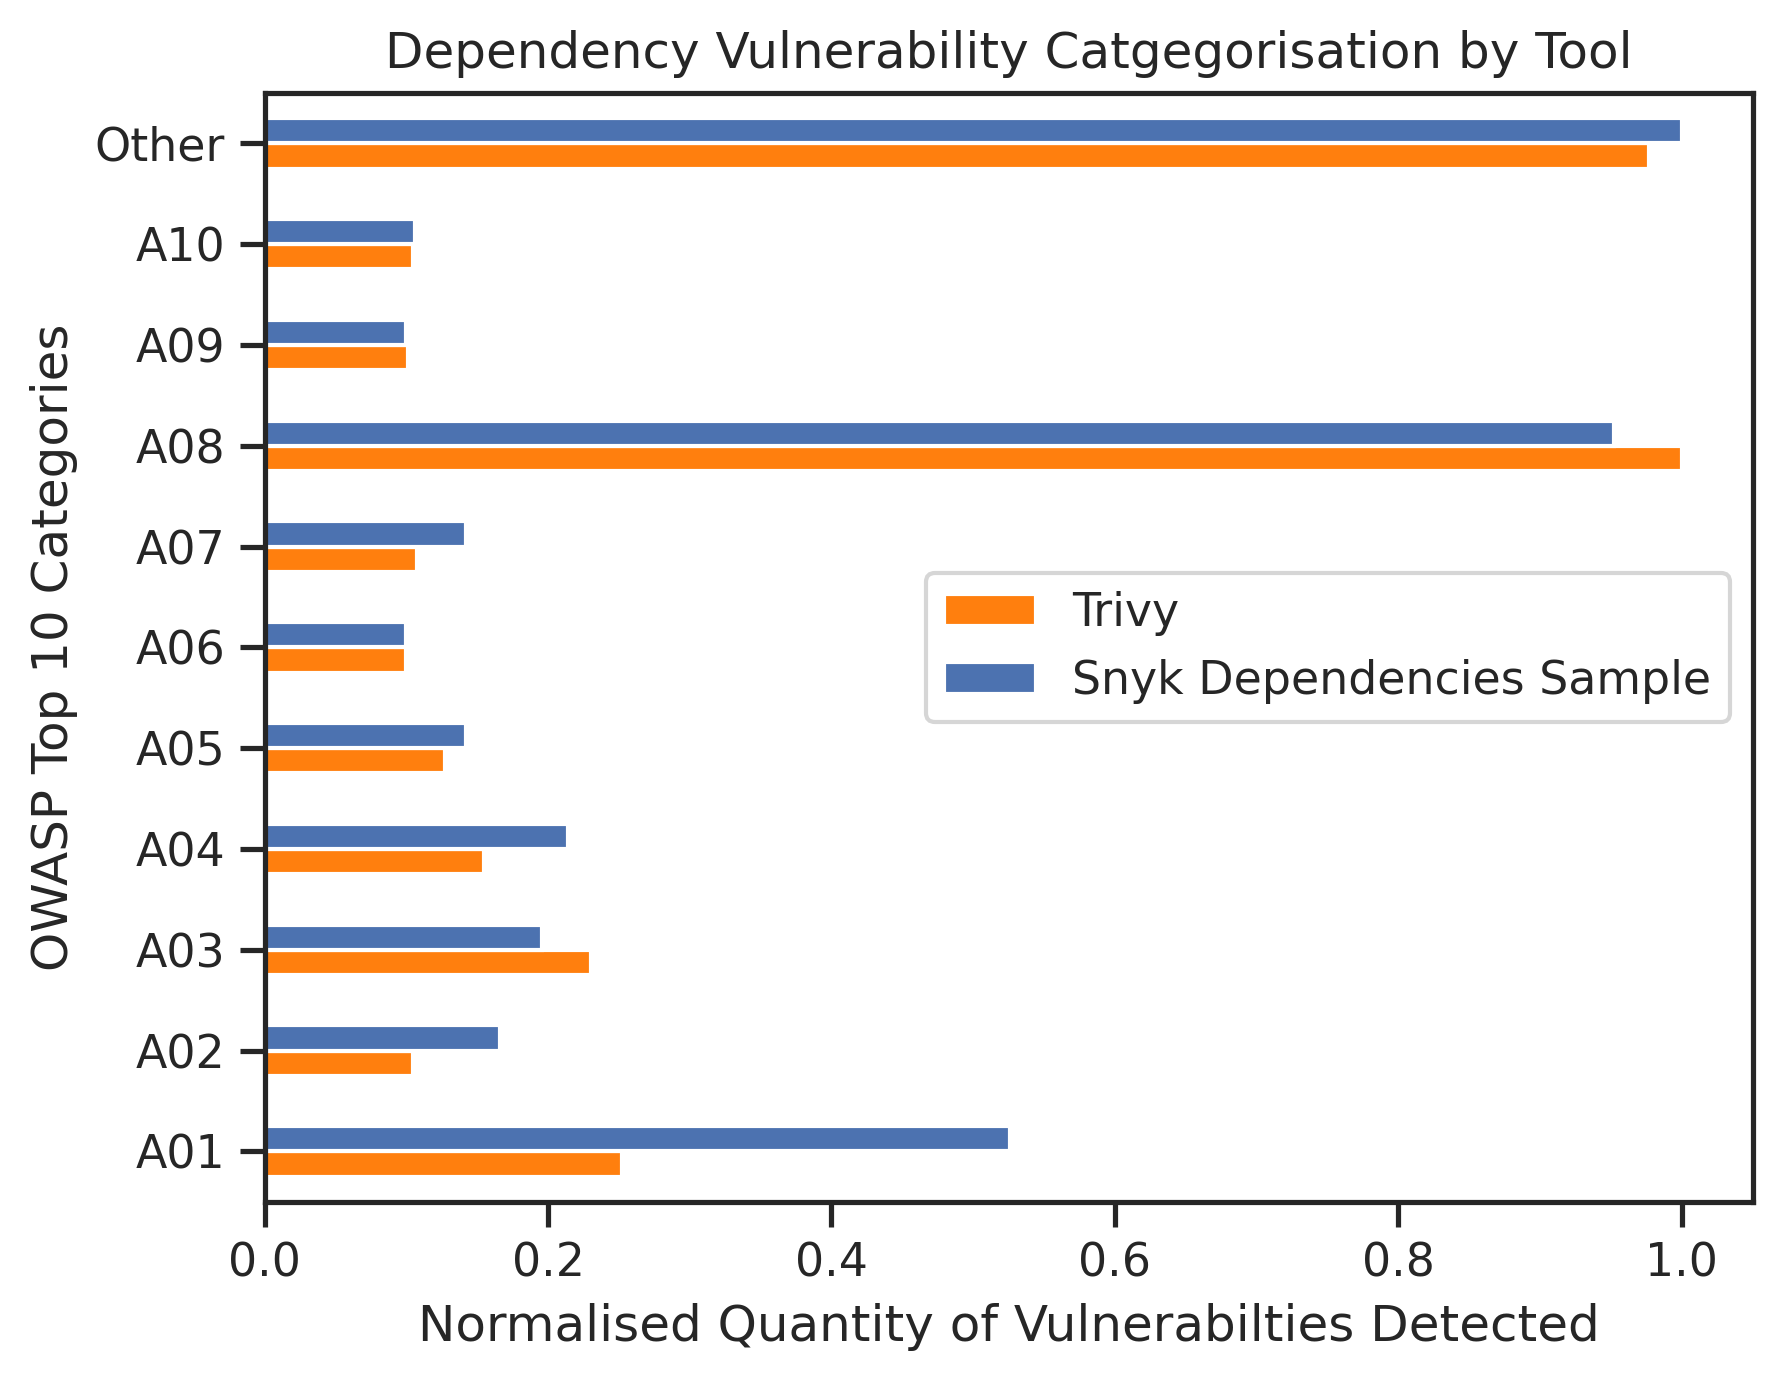

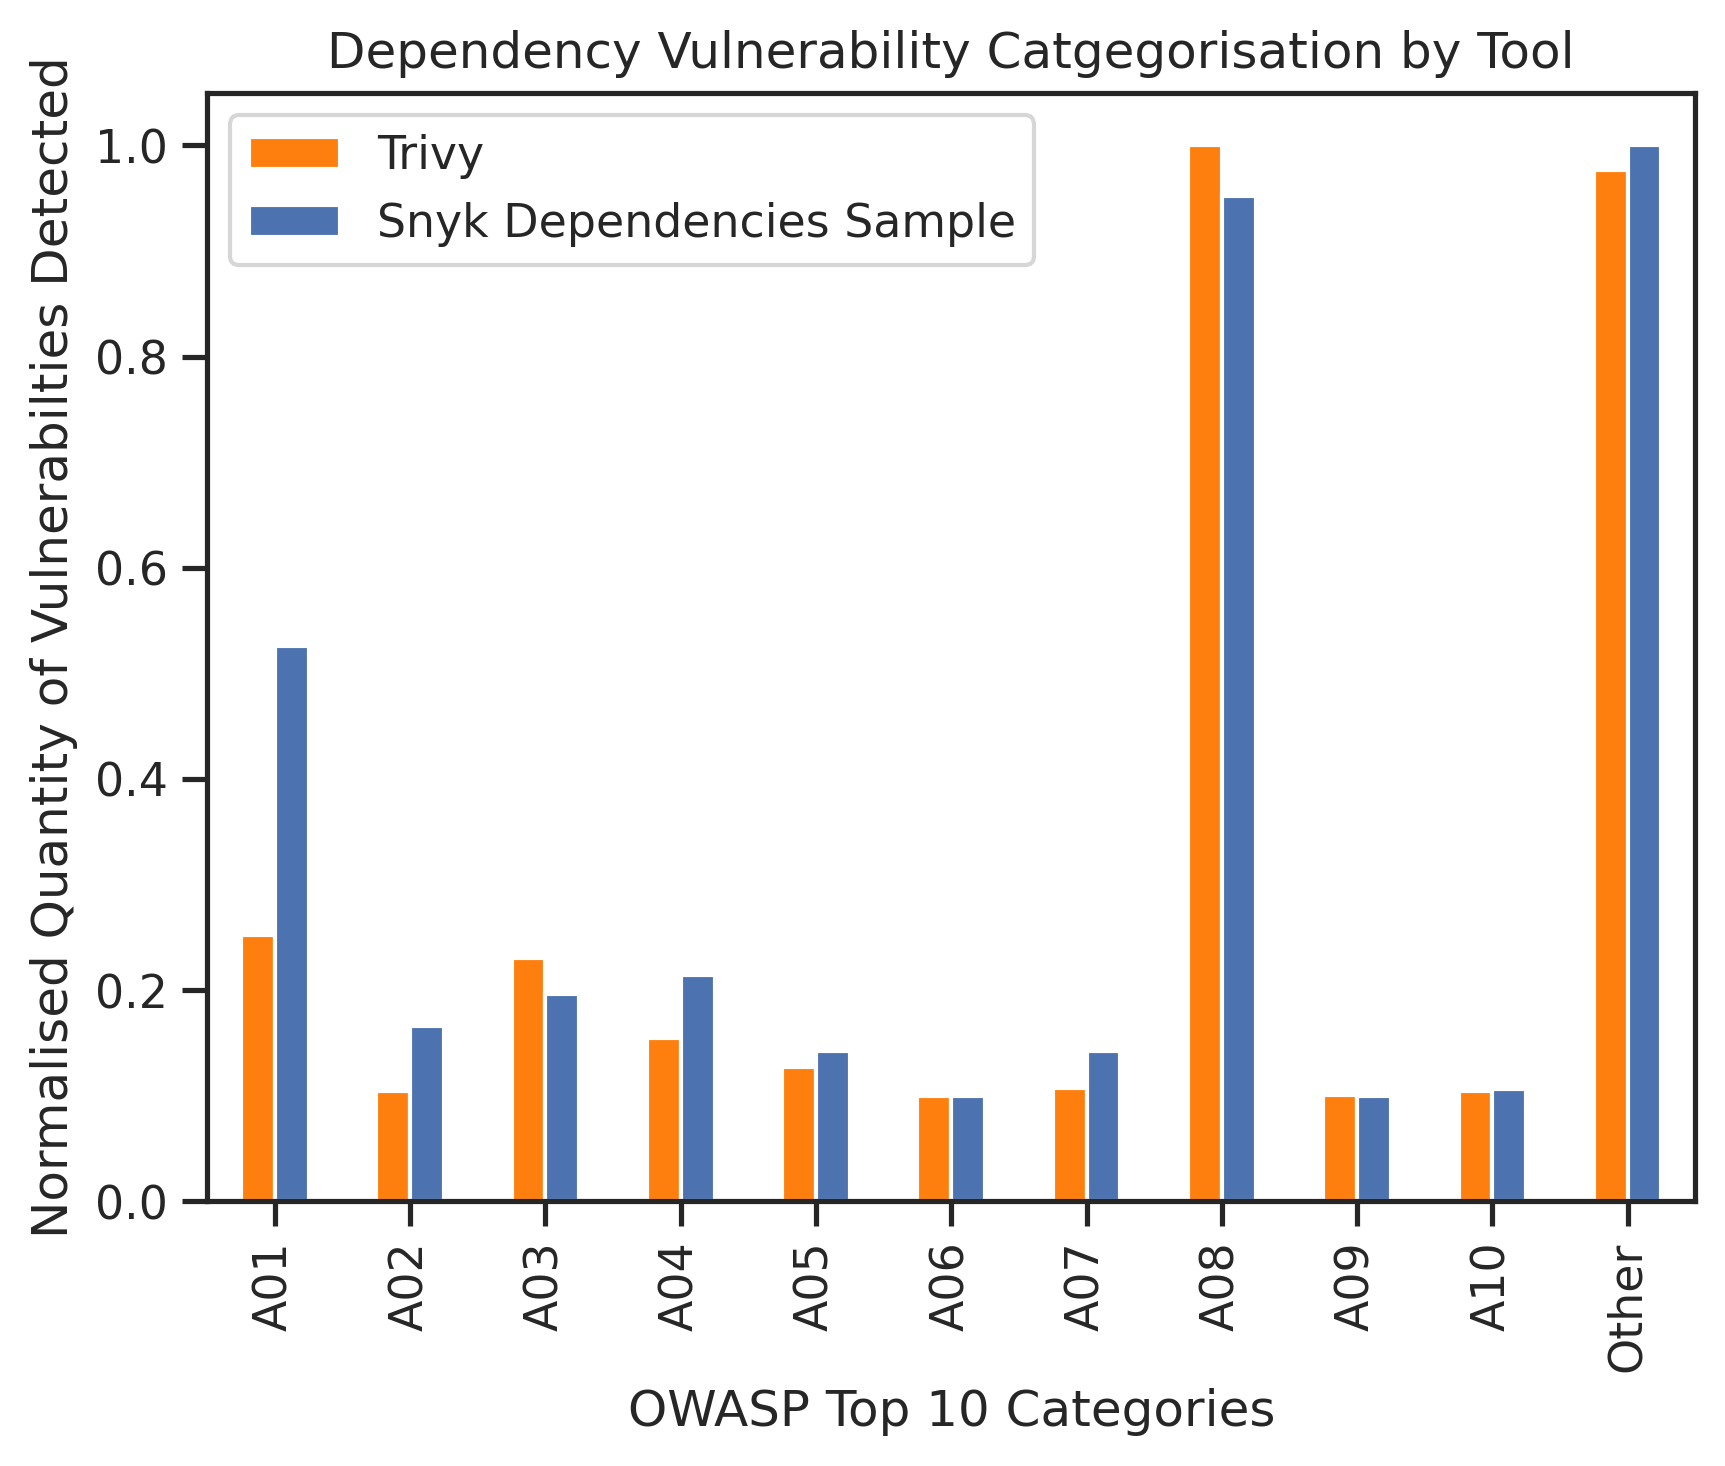

In [16]:
categories = pd.read_excel('OWASP-vs-Tools.ods', engine='odf', na_values=["-"])
categories = categories.set_index('Code')
categories = categories[['Trivy','Snyk Dependencies Sample']]

normalize_max = 1
normalize_min = 0.1

columns = ["Trivy","Snyk Dependencies Sample"]
categories[columns]= preprocessing.minmax_scale(categories[columns], feature_range=(normalize_min, normalize_max))

categories.plot(kind="barh", stacked=False, color=('#ff7f0e', 'C0'))

plt.title("Dependency Vulnerability Catgegorisation by Tool")
plt.ylabel("OWASP Top 10 Categories")
plt.xlabel("Normalised Quantity of Vulnerabilties Detected")

categories.plot(kind="bar", stacked=False, color=('#ff7f0e', 'C0'))

plt.title("Dependency Vulnerability Catgegorisation by Tool")
plt.xlabel("OWASP Top 10 Categories")
plt.ylabel("Normalised Quantity of Vulnerabilties Detected")

In [12]:
categories = pd.read_excel('OWASP-vs-Tools.ods', engine='odf', na_values=["-"])
categories = categories.set_index('Name')
categories = categories[["Trivy","Snyk Dependencies Sample"]]

normalize_max = 1
normalize_min = 0.1

columns = ["Trivy","Snyk Dependencies Sample"]
categories[columns]= preprocessing.minmax_scale(categories[columns], feature_range=(normalize_min, normalize_max))

categories = categories.apply(lambda x: x*100/sum(x), axis=0)
categories.T.plot(kind="barh", stacked=True)

plt.title("Dependency Vulnerability Categorisation")
plt.xlabel("Proportion of Total Vulnerabilities")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title='Owasp Top 10 Categories')





categories = pd.read_excel('OWASP-vs-Tools.ods', engine='odf', na_values=["-"])
categories = categories.set_index('Name')
categories = categories[['Snyk','Deepsource']]

normalize_max = 1
normalize_min = 0.1

columns = ['Snyk','Deepsource']
categories[columns]= preprocessing.minmax_scale(categories[columns], feature_range=(normalize_min, normalize_max))

categories = categories.apply(lambda x: x*100/sum(x), axis=0)
categories.T.plot(kind="barh", stacked=True)

plt.title("Code Analysis Vulnerability Categorisation")
plt.xlabel("Proportion of Total Vulnerabilities")
plt.legend('',frameon=False)

NameError: name 'pd' is not defined